# Challenge #7: Analyse Growth and Present Insights to the Telangana Government

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dm_date = pd.read_csv(r'C:\Users\ADMIN\OneDrive\13 - Data Science\07. Codebasics\01. Projects - Real Time\07. Analyse Growth and Present Insights to the Telangana Government\C7_Input Files\C7_Input Files\dataset\dim_date.csv')
dim_districts = pd.read_csv(r'C:\Users\ADMIN\OneDrive\13 - Data Science\07. Codebasics\01. Projects - Real Time\07. Analyse Growth and Present Insights to the Telangana Government\C7_Input Files\C7_Input Files\dataset\dim_districts.csv')
fact_stamps = pd.read_csv(r'C:\Users\ADMIN\OneDrive\13 - Data Science\07. Codebasics\01. Projects - Real Time\07. Analyse Growth and Present Insights to the Telangana Government\C7_Input Files\C7_Input Files\dataset\fact_stamps.csv')
fact_transport = pd.read_csv(r'C:\Users\ADMIN\OneDrive\13 - Data Science\07. Codebasics\01. Projects - Real Time\07. Analyse Growth and Present Insights to the Telangana Government\C7_Input Files\C7_Input Files\dataset\fact_transport.csv')
fact_TS_iPASS = pd.read_csv(r'C:\Users\ADMIN\OneDrive\13 - Data Science\07. Codebasics\01. Projects - Real Time\07. Analyse Growth and Present Insights to the Telangana Government\C7_Input Files\C7_Input Files\dataset\fact_TS_iPASS.csv')

In [3]:
df_dm_date = dm_date.copy()
df_dim_districts = dim_districts.copy()
df_fact_stamps = fact_stamps.copy()
df_fact_transport = fact_transport.copy()
df_fact_TS_iPASS = fact_TS_iPASS.copy()

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Objective:

• Explore Stamp Registration, Transportation and Ts-Ipass Datasets. Understand their attributes, categories and time period.

• Analyze trends and patterns within each department.

• Identify growth opportunities and areas needing attention.

• Find correlation among these departments and report the overall growth of the state through insights and relevant visuals such as shape maps.

-----

# Primary Questions:

## 1. Stamp Registration

### Research Question 1:
*
<font color='blue'>   
How does the revenue generated from document registration vary across districts in Telangana? List down the top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.
</font>

In [5]:
df_dm_date['month'] = pd.to_datetime(df_dm_date['month'])
df_dm_date.head()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019


In [6]:
df_fact_stamps['month'] = pd.to_datetime(df_fact_stamps['month'])
df_fact_stamps.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [7]:
# Merging the dataframes:
df_fact_stamps_01 = pd.merge(df_fact_stamps,df_dim_districts,how='inner',on='dist_code').sort_values(
    by='documents_registered_rev',ascending=False)

df_fact_stamps_01 = pd.merge(df_fact_stamps_01,df_dm_date,how='inner', on='month')
df_fact_stamps_01.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,district,Mmm,quarter,fiscal_year
0,15_1,2022-01-01,24420,4073496212,27045,4294273078,Rangareddy,Jan,Q4,2021
1,15_2,2022-01-01,15706,2169471006,17268,2665104212,Medchal_Malkajgiri,Jan,Q4,2021
2,16_1,2022-01-01,6399,1441794229,7064,1505730143,Hyderabad,Jan,Q4,2021
3,17_2,2022-01-01,6788,686612911,7613,747976314,Sangareddy,Jan,Q4,2021
4,21_1,2022-01-01,4562,232096344,5460,264045590,Hanumakonda,Jan,Q4,2021


#
*
<font color='green'>
(a) How does the revenue generated from document registration vary across districts in Telangana? 
</font>

####  Revenue generated from document registration vary across districts in Telangana

In [8]:
df1_1 = df_fact_stamps_01.groupby('district')[['documents_registered_rev']].sum().sort_values(by='documents_registered_rev', ascending=False)
df1_1

,documents_registered_rev
district,
Rangareddy,108198682809
Medchal_Malkajgiri,64071382839
Hyderabad,38396743983
Sangareddy,22024502771
Hanumakonda,7927494100
Yadadri Bhuvanagiri,5973744502
Khammam,5606141586
Nalgonda,4521634367
Nizamabad,4046937361


#
*
<font color='green'>
(b) List down the top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.
</font>

#### Top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.

In [9]:
df_fact_stamps_02 = df_fact_stamps_01[(df_fact_stamps_01['fiscal_year']>=2019)|(df_fact_stamps_01['fiscal_year']<=2022)]
#
df1_top5 = df_fact_stamps_02.groupby('district')[['documents_registered_rev']].sum().nlargest(5,'documents_registered_rev')
df1_top5

,documents_registered_rev
district,
Rangareddy,108198682809
Medchal_Malkajgiri,64071382839
Hyderabad,38396743983
Sangareddy,22024502771
Hanumakonda,7927494100


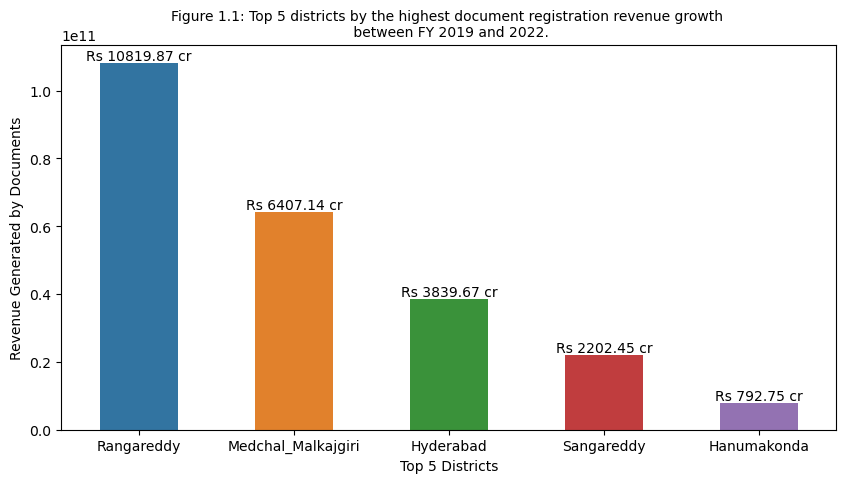

In [10]:
x = df1_top5.index
y = df1_top5['documents_registered_rev']
plt.figure(figsize=(10,5))
sns.barplot(data=df_fact_stamps_02, x=x, y=y, width=0.5)
for i,v in enumerate(df1_top5['documents_registered_rev']):
    plt.text(i,v,'Rs '+str(round(v/10000000,2))+' cr',ha='center', va='bottom')
plt.xlabel('Top 5 Districts')
plt.ylabel('Revenue Generated by Documents')
plt.title('Figure 1.1: Top 5 districts by the highest document registration revenue growth \n between FY 2019 and 2022.', fontsize=10)
plt.show()

### Insight:

> Post calculating revenue generated by document by each districts of Telangna state, There are 5 disctricts 5 districts are contributing higher in state revenue 'Rangareddy', 'Medchal_Malkajgiri', 'Hyderabad', 'Sangareddy', and 'Hanumakonda'. 

> Rangareddy district holds first place, followed by 'Medchal_Malkajgiri' at second place, 'Hyderabad' at thrid place, 'Sangareddy' at fourth place, and at the fifth place



### Research Question 2:

*
<font color='blue'>
How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts? List down the top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022?
</font>

In [11]:
df_fact_stamps_01.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,district,Mmm,quarter,fiscal_year
0,15_1,2022-01-01,24420,4073496212,27045,4294273078,Rangareddy,Jan,Q4,2021
1,15_2,2022-01-01,15706,2169471006,17268,2665104212,Medchal_Malkajgiri,Jan,Q4,2021
2,16_1,2022-01-01,6399,1441794229,7064,1505730143,Hyderabad,Jan,Q4,2021
3,17_2,2022-01-01,6788,686612911,7613,747976314,Sangareddy,Jan,Q4,2021
4,21_1,2022-01-01,4562,232096344,5460,264045590,Hanumakonda,Jan,Q4,2021


#
*
<font color='green'>
(a) How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts?   
</font>

In [12]:
df2_1 = df_fact_stamps_01[['district','documents_registered_rev','estamps_challans_rev']]
df2_2 = df2_1.groupby('district')[['documents_registered_rev','estamps_challans_rev']].sum()

def compare(row):
    if row['documents_registered_rev']>row['estamps_challans_rev']:
        return 'Document'
    else:
        return 'e-Stamp'

df2_2['higher revenue by'] = df2_2.apply(compare,axis=1)

df2_2

,documents_registered_rev,estamps_challans_rev,higher revenue by
district,,,
Adilabad,1066971491,831038256,Document
Bhadradri Kothagudem,824712666,616009645,Document
Hanumakonda,7927494100,5751116148,Document
Hyderabad,38396743983,28652397786,Document
Jagtial,1666081307,1202617958,Document
Jangoan,1329898858,842885890,Document
Jogulamba Gadwal,978779682,709344353,Document
Kamareddy,1396196267,982520443,Document
Karimnagar,4024475054,2989066355,Document


### Insight:


> Revenue generated by documents registration is higher than e-Stamp registration for all districts.


#

*
<font color='green'>
(b) List down the top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022?
    </font>

In [13]:
df2_3 = df_fact_stamps_01[(df_fact_stamps_01['fiscal_year'] == 2022)]
df2_4 = df2_3.groupby(['district'],as_index=False)[['documents_registered_rev','estamps_challans_rev']].sum()

In [14]:
df2_4['difference'] = df2_4['estamps_challans_rev'] - df2_4['documents_registered_rev']
df2_5 = df2_4.sort_values(by='difference', ascending=False).nlargest(5,'difference')
df2_5

,district,documents_registered_rev,estamps_challans_rev,difference
24,Rangareddy,37697750946,38349357618,651606672
3,Hyderabad,14266012441,14374315032,108302591
9,Khammam,1971647539,2002220314,30572775
2,Hanumakonda,2817238587,2846856844,29618257
31,Yadadri Bhuvanagiri,2167480603,2185270667,17790064


In [15]:
df2_6 = df2_5[['district','documents_registered_rev','estamps_challans_rev']]
df2_7 = pd.melt(df2_6,id_vars='district', var_name='instrument',value_name='amount')
df2_7

,district,instrument,amount
0,Rangareddy,documents_registered_rev,37697750946
1,Hyderabad,documents_registered_rev,14266012441
2,Khammam,documents_registered_rev,1971647539
3,Hanumakonda,documents_registered_rev,2817238587
4,Yadadri Bhuvanagiri,documents_registered_rev,2167480603
5,Rangareddy,estamps_challans_rev,38349357618
6,Hyderabad,estamps_challans_rev,14374315032
7,Khammam,estamps_challans_rev,2002220314
8,Hanumakonda,estamps_challans_rev,2846856844
9,Yadadri Bhuvanagiri,estamps_challans_rev,2185270667


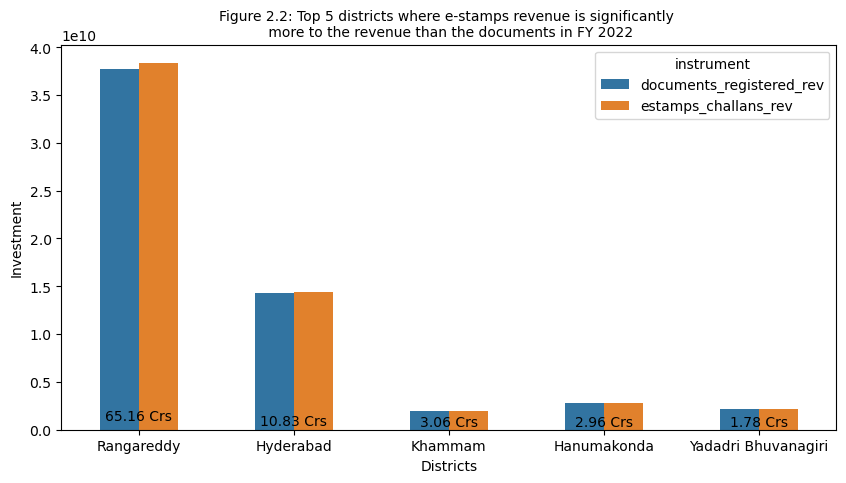

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2_7, x=df2_7['district'], y=df2_7['amount'], hue=df2_7['instrument'], width=0.5)
plt.xlabel('Districts')
plt.ylabel('Investment')
plt.title('Figure 2.2: Top 5 districts where e-stamps revenue is significantly \n more to the revenue than the documents in FY 2022', fontsize=10)
for i,v in enumerate(df2_5['difference']):
    plt.text(i,v, str(round(v/10000000,2))+' Crs', ha='center', va='bottom')

plt.show()

In [17]:
df2_7['district'].unique()

array(['Rangareddy', 'Hyderabad', 'Khammam', 'Hanumakonda',
       'Yadadri Bhuvanagiri'], dtype=object)

### Insight:

> The top 5 districts "Rangareddy", "Hyderabad", "Khammam", "Hanumakonda", and "Yadadri Bhuvanagiri" with respect the revenue generated by e-challan in FY 2022. 

> In above graph, Blue bar shows revenue generated by document registration and Yellow bars show the revenue generated by e-Stamp registration. The data label in each bars shows the difference between revenue generated by document registration and by e-Stamp registration. For instance, in "Rangareddy" disctrict, e-Stamp generated revenue is 65.16 crs higher than document generated revenue in FY 20222

### Research Question 3:

*
<font color='blue'>
Is there any alteration of e-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan? If so, what suggestions would you propose to the government?
</font>

In [18]:
df_fact_stamps_01.head(1)

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,district,Mmm,quarter,fiscal_year
0,15_1,2022-01-01,24420,4073496212,27045,4294273078,Rangareddy,Jan,Q4,2021


In [19]:
df3_1 = df_fact_stamps_01.groupby('month',as_index=False)[['documents_registered_cnt']].sum()
df3_2 = df_fact_stamps_01.groupby('month',as_index=False)[['estamps_challans_cnt']].sum()

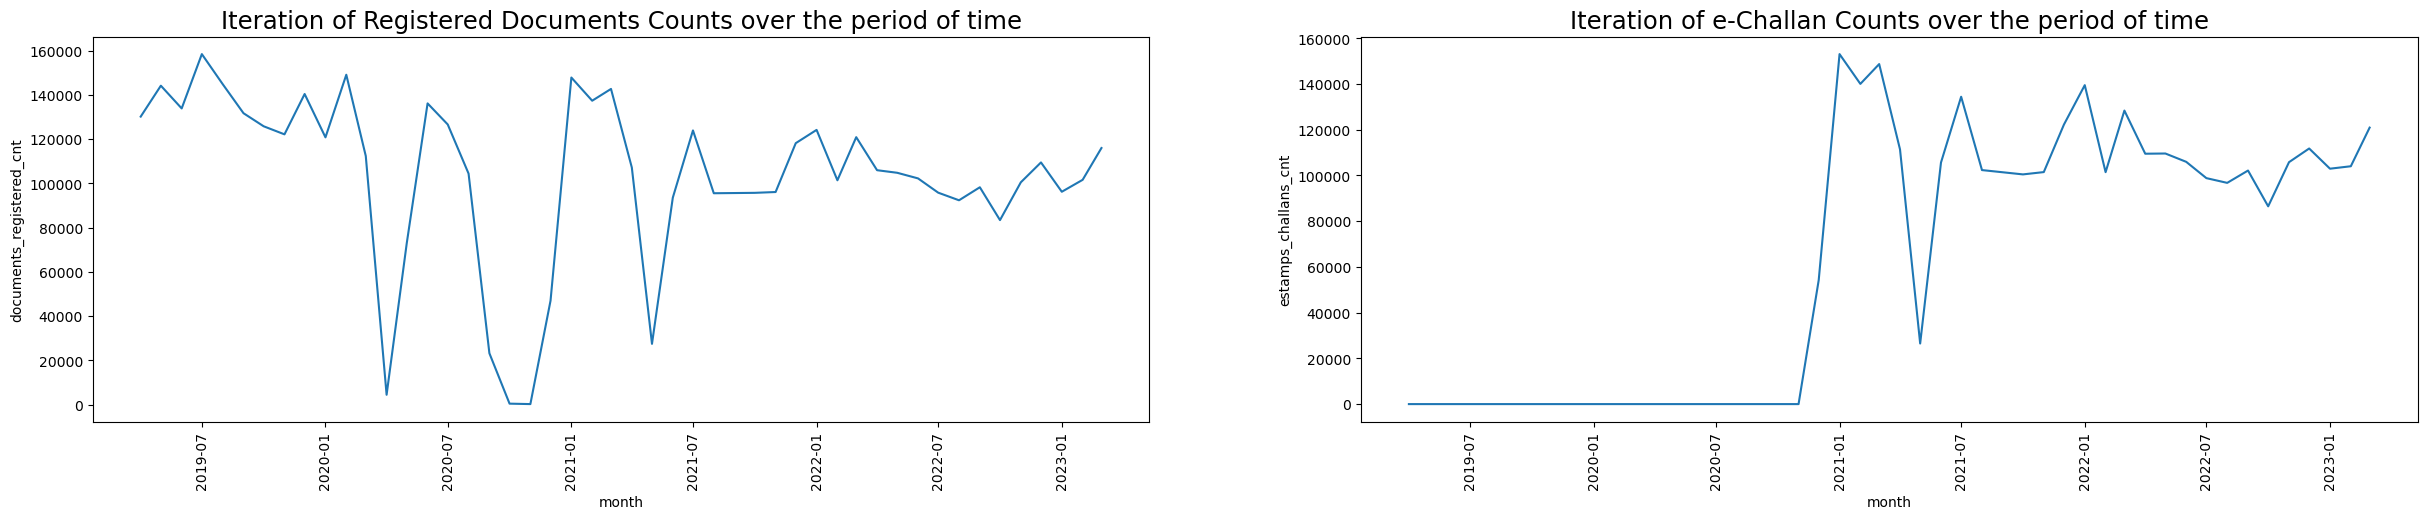

In [20]:
fig, axes = plt.subplots(1,2,figsize=(30,5))

sns.lineplot(data=df3_1,x=df3_1['month'],y=df3_1['documents_registered_cnt'],ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Iteration of Registered Documents Counts over the period of time', fontsize=17.5)

sns.lineplot(data=df3_2,x=df3_2['month'],y=df3_2['estamps_challans_cnt'],ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Iteration of e-Challan Counts over the period of time', fontsize=17.5)

plt.show()

### Insight:

> In document registration count, it showed the consistency in the Fy 2019 followed multiple sharp declines have been seen in 2020-03, 2020-10, and 2021-06

> eChallan resigtration has started from November 2020, since then, it experienced the rapid growth in sale till March 2021. There is a sharp decline observed in sale of e-Challan in month of May 2021, which again increased rapidly till July 2021. After July 2021, the e-challan registration has been consistent with small fluctuations.

### Research Question 4:
*
<font color='blue'>
Categorize districts into three segments based on their stamp registration revenue generation during the fiscal year 2021 to 2022.
<font>

In [21]:
df_fact_stamps_01['fiscal_year'].unique()

array([2021, 2022, 2020, 2019], dtype=int64)

In [22]:
df_fact_stamps_y2021_2022 = df_fact_stamps_01[(df_fact_stamps_01['fiscal_year'] == 2021)|(df_fact_stamps_01['fiscal_year'] == 2022)]
df_fact_stamps_y2021_2022.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,district,Mmm,quarter,fiscal_year
0,15_1,2022-01-01,24420,4073496212,27045,4294273078,Rangareddy,Jan,Q4,2021
1,15_2,2022-01-01,15706,2169471006,17268,2665104212,Medchal_Malkajgiri,Jan,Q4,2021
2,16_1,2022-01-01,6399,1441794229,7064,1505730143,Hyderabad,Jan,Q4,2021
3,17_2,2022-01-01,6788,686612911,7613,747976314,Sangareddy,Jan,Q4,2021
4,21_1,2022-01-01,4562,232096344,5460,264045590,Hanumakonda,Jan,Q4,2021


In [23]:
df4_1 = df_fact_stamps_y2021_2022[['district','documents_registered_rev','estamps_challans_rev', 'fiscal_year']]

df4_1['estamps_rev_segment'] = pd.qcut(df4_1['estamps_challans_rev'],q=3,labels=['low','medium','high'])
df4_1['document_rev_segment'] = pd.qcut(df4_1['documents_registered_rev'],q=3,labels=['low','medium','high'])

In [24]:
df4_1['estamps_rev_segment'].unique()
df4_1['document_rev_segment'].unique()

['high', 'medium', 'low']
Categories (3, object): ['low' < 'medium' < 'high']

In [25]:
df4_1

,district,documents_registered_rev,estamps_challans_rev,fiscal_year,estamps_rev_segment,document_rev_segment
0,Rangareddy,4073496212,4294273078,2021,high,high
1,Medchal_Malkajgiri,2169471006,2665104212,2021,high,high
2,Hyderabad,1441794229,1505730143,2021,high,high
3,Sangareddy,686612911,747976314,2021,high,high
4,Hanumakonda,232096344,264045590,2021,high,high
...,...,...,...,...,...,...
1371,Wanaparthy,3717639,3711965,2021,low,low
1372,Jangoan,2806900,2385470,2021,low,low
1373,Mulugu,2048729,1263297,2021,low,low
1374,Rajanna Sircilla,1487250,1638261,2021,low,low


#### (a) Categorize districts into three segments based on their document registration revenue generation during the fiscal year 2021 to 2022:

In [26]:
df4_1_dr = df4_1.groupby('document_rev_segment')[['documents_registered_rev']].sum().sort_values(by='documents_registered_rev', ascending=False)
df4_1_dr

,documents_registered_rev
document_rev_segment,
high,173627297365
medium,12262585153
low,4881502679


#### (b) Categorize districts into three segments based on their e-Stamp registration revenue generation during the fiscal year 2021 to 2022:

In [27]:
df4_1_er = df4_1.groupby('estamps_rev_segment')[['estamps_challans_rev']].sum().sort_values(by='estamps_challans_rev', ascending=False)
df4_1_er

,estamps_challans_rev
estamps_rev_segment,
high,175420921674
medium,12490654981
low,4903627378


#### Plotting the both segment :

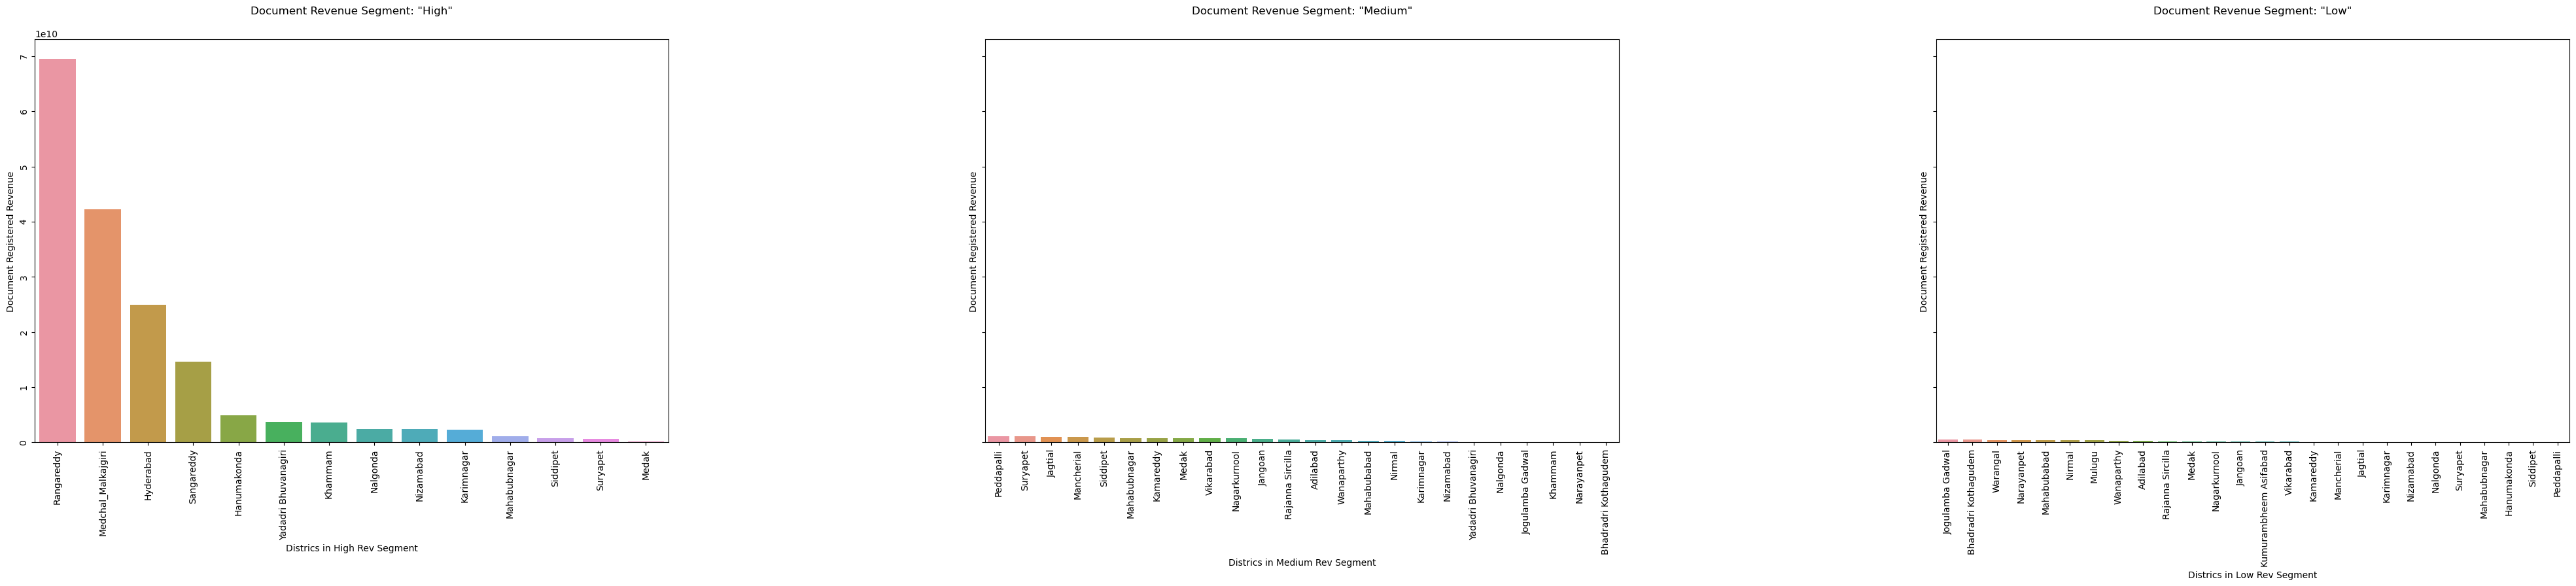

In [28]:
fig, axes = plt.subplots(1,3,figsize=(50,8), sharey=True)
df4_1_hi = df4_1[(df4_1['document_rev_segment'] == 'high')].groupby('district')[['documents_registered_rev']].sum().sort_values(by='documents_registered_rev', ascending=False)
sns.barplot(data=df4_1_hi, x=df4_1_hi.index, y=df4_1_hi['documents_registered_rev'], ax=axes[0])
axes[0].tick_params(rotation=90)
axes[0].set_title('Document Revenue Segment: "High"', y=1.05)
axes[0].set_xlabel('Districs in High Rev Segment')
axes[0].set_ylabel('Document Registered Revenue')

df4_1_md = df4_1[(df4_1['document_rev_segment'] == 'medium')].groupby('district')[['documents_registered_rev']].sum().sort_values(by='documents_registered_rev', ascending=False)
sns.barplot(data=df4_1_md, x=df4_1_md.index, y=df4_1_md['documents_registered_rev'], ax=axes[1])
axes[1].tick_params(rotation=90)
axes[1].set_title('Document Revenue Segment: "Medium"', y=1.05)
axes[1].set_xlabel('Districs in Medium Rev Segment')
axes[1].set_ylabel('Document Registered Revenue')

df4_1_lo = df4_1[(df4_1['document_rev_segment'] == 'low')].groupby('district')[['documents_registered_rev']].sum().sort_values(by='documents_registered_rev', ascending=False)
sns.barplot(data=df4_1_lo, x=df4_1_lo.index, y=df4_1_lo['documents_registered_rev'], ax=axes[2])
axes[2].tick_params(rotation=90)
axes[2].set_title('Document Revenue Segment: "Low"', y=1.05)
axes[2].set_xlabel('Districs in Low Rev Segment')
axes[2].set_ylabel('Document Registered Revenue')

plt.subplots_adjust(wspace=0.5, hspace=7.5)
plt.show()

#### Insight:

> Based on "documents_registered_rev" and "estamps_challans_rev" in FY 2021 and 2021 of dataset, the districts have been classified in 3 segments 'high', 'medium', and 'low'.
>   1. 'high' segment: represents the districts with high in revenue
>   2. 'medium' segment: represents the districts which have generated medium revenue
>   3. 'low' segement: includes the districts with low revenue.

> The 3 bar graphs have also been ploted to exhibit the all districts and their revenue categorised in 3 segments.

----

## 2. Transportation

### Research Question 5:
*
<font color='blue'>  
Investigate whether there is any correlation between vehicle sales and specific months or seasons in different districts. Are there any months or seasons that consistently show higher or lower sales rate, and if yes, what could be the driving factors? (Consider Fuel-Type category only)

In [29]:
df_fact_transport_merged = pd.merge(df_fact_transport,df_dim_districts,how='inner',on='dist_code')
df_fact_transport_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dist_code                  1440 non-null   object
 1   month                      1440 non-null   object
 2   fuel_type_petrol           1440 non-null   int64 
 3   fuel_type_diesel           1440 non-null   int64 
 4   fuel_type_electric         1440 non-null   int64 
 5   fuel_type_others           1440 non-null   int64 
 6   vehicleClass_MotorCycle    1440 non-null   int64 
 7   vehicleClass_MotorCar      1440 non-null   int64 
 8   vehicleClass_AutoRickshaw  1440 non-null   int64 
 9   vehicleClass_Agriculture   1440 non-null   int64 
 10  vehicleClass_others        1440 non-null   int64 
 11  seatCapacity_1_to_3        1440 non-null   int64 
 12  seatCapacity_4_to_6        1440 non-null   int64 
 13  seatCapacity_above_6       1440 non-null   int64 
 14  Brand_ne

In [30]:
# df_fact_transport_merged['month'] = pd.to_datetime(df_fact_transport_merged['month'])
df_fact_transport_merged['month'] = pd.to_datetime(df_fact_transport_merged['month'])
df_fact_transport_merged = pd.merge(df_fact_transport_merged,df_dm_date, how='inner',on='month')

In [31]:
df_fact_transport_merged.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district,Mmm,quarter,fiscal_year
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,...,4182,717,19542,1477,19856,1163,Rangareddy,Apr,Q1,2019
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,...,189,33,3322,56,3203,175,Kamareddy,Apr,Q1,2019
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,...,104,5,1751,41,1648,144,Rajanna Sircilla,Apr,Q1,2019
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,...,146,16,2209,35,2075,169,Jangoan,Apr,Q1,2019
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,...,145,20,1820,41,1701,160,Jayashankar Bhupalpally,Apr,Q1,2019


In [32]:
df05_01_ft = df_fact_transport_merged[['district', 'month', 'fuel_type_petrol','fuel_type_diesel','fuel_type_electric','fuel_type_others']]
df05_01_ft.head()

,district,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others
0,Rangareddy,2019-04-01,17910,3011,76,22
1,Kamareddy,2019-04-01,3066,306,6,0
2,Rajanna Sircilla,2019-04-01,1577,215,0,0
3,Jangoan,2019-04-01,1961,281,2,0
4,Jayashankar Bhupalpally,2019-04-01,1552,309,0,0


####  (a) correlation between vehicle sales and specific months or seasons in different districts. 

In [33]:
# Vehicle sale by fuel type for all telangna districts
df05_02 = df05_01_ft.groupby(['district'], as_index=False).sum()
df05_02.head()

,district,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others
0,Adilabad,66786,11764,647,120
1,Bhadradri Kothagudem,117663,27885,396,841
2,Hyderabad,976654,93133,32012,41680
3,Jagtial,108718,16428,1147,249
4,Jangoan,59016,14519,266,488


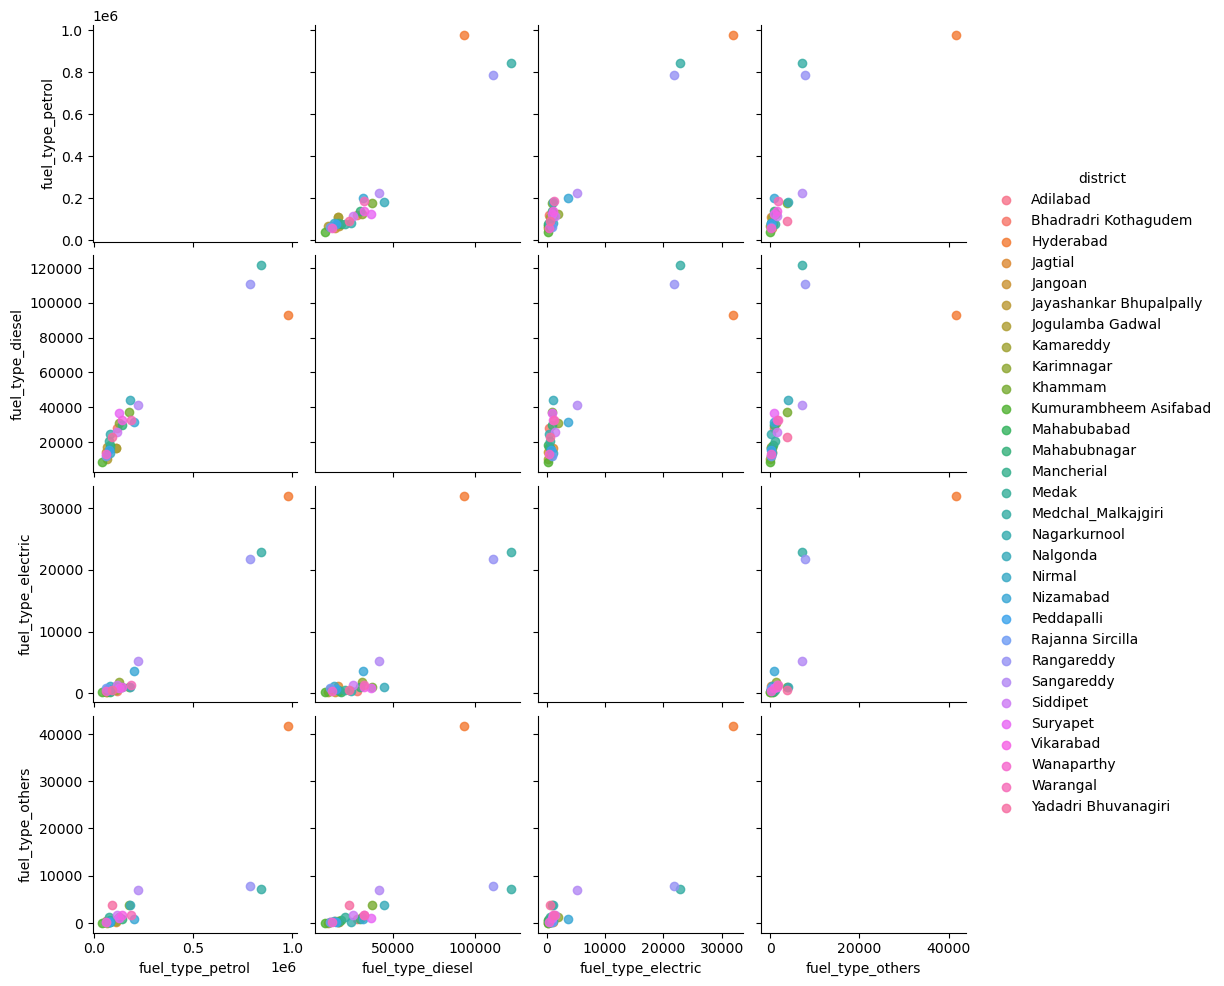

In [34]:
# Corelation fuel type vehicle sales for all districts

sns.pairplot(data=df05_02, hue='district', kind='reg')
plt.show()

#### Insight:

> The plot shows the corelation between the vehicle sales by their fuel types for each districts.

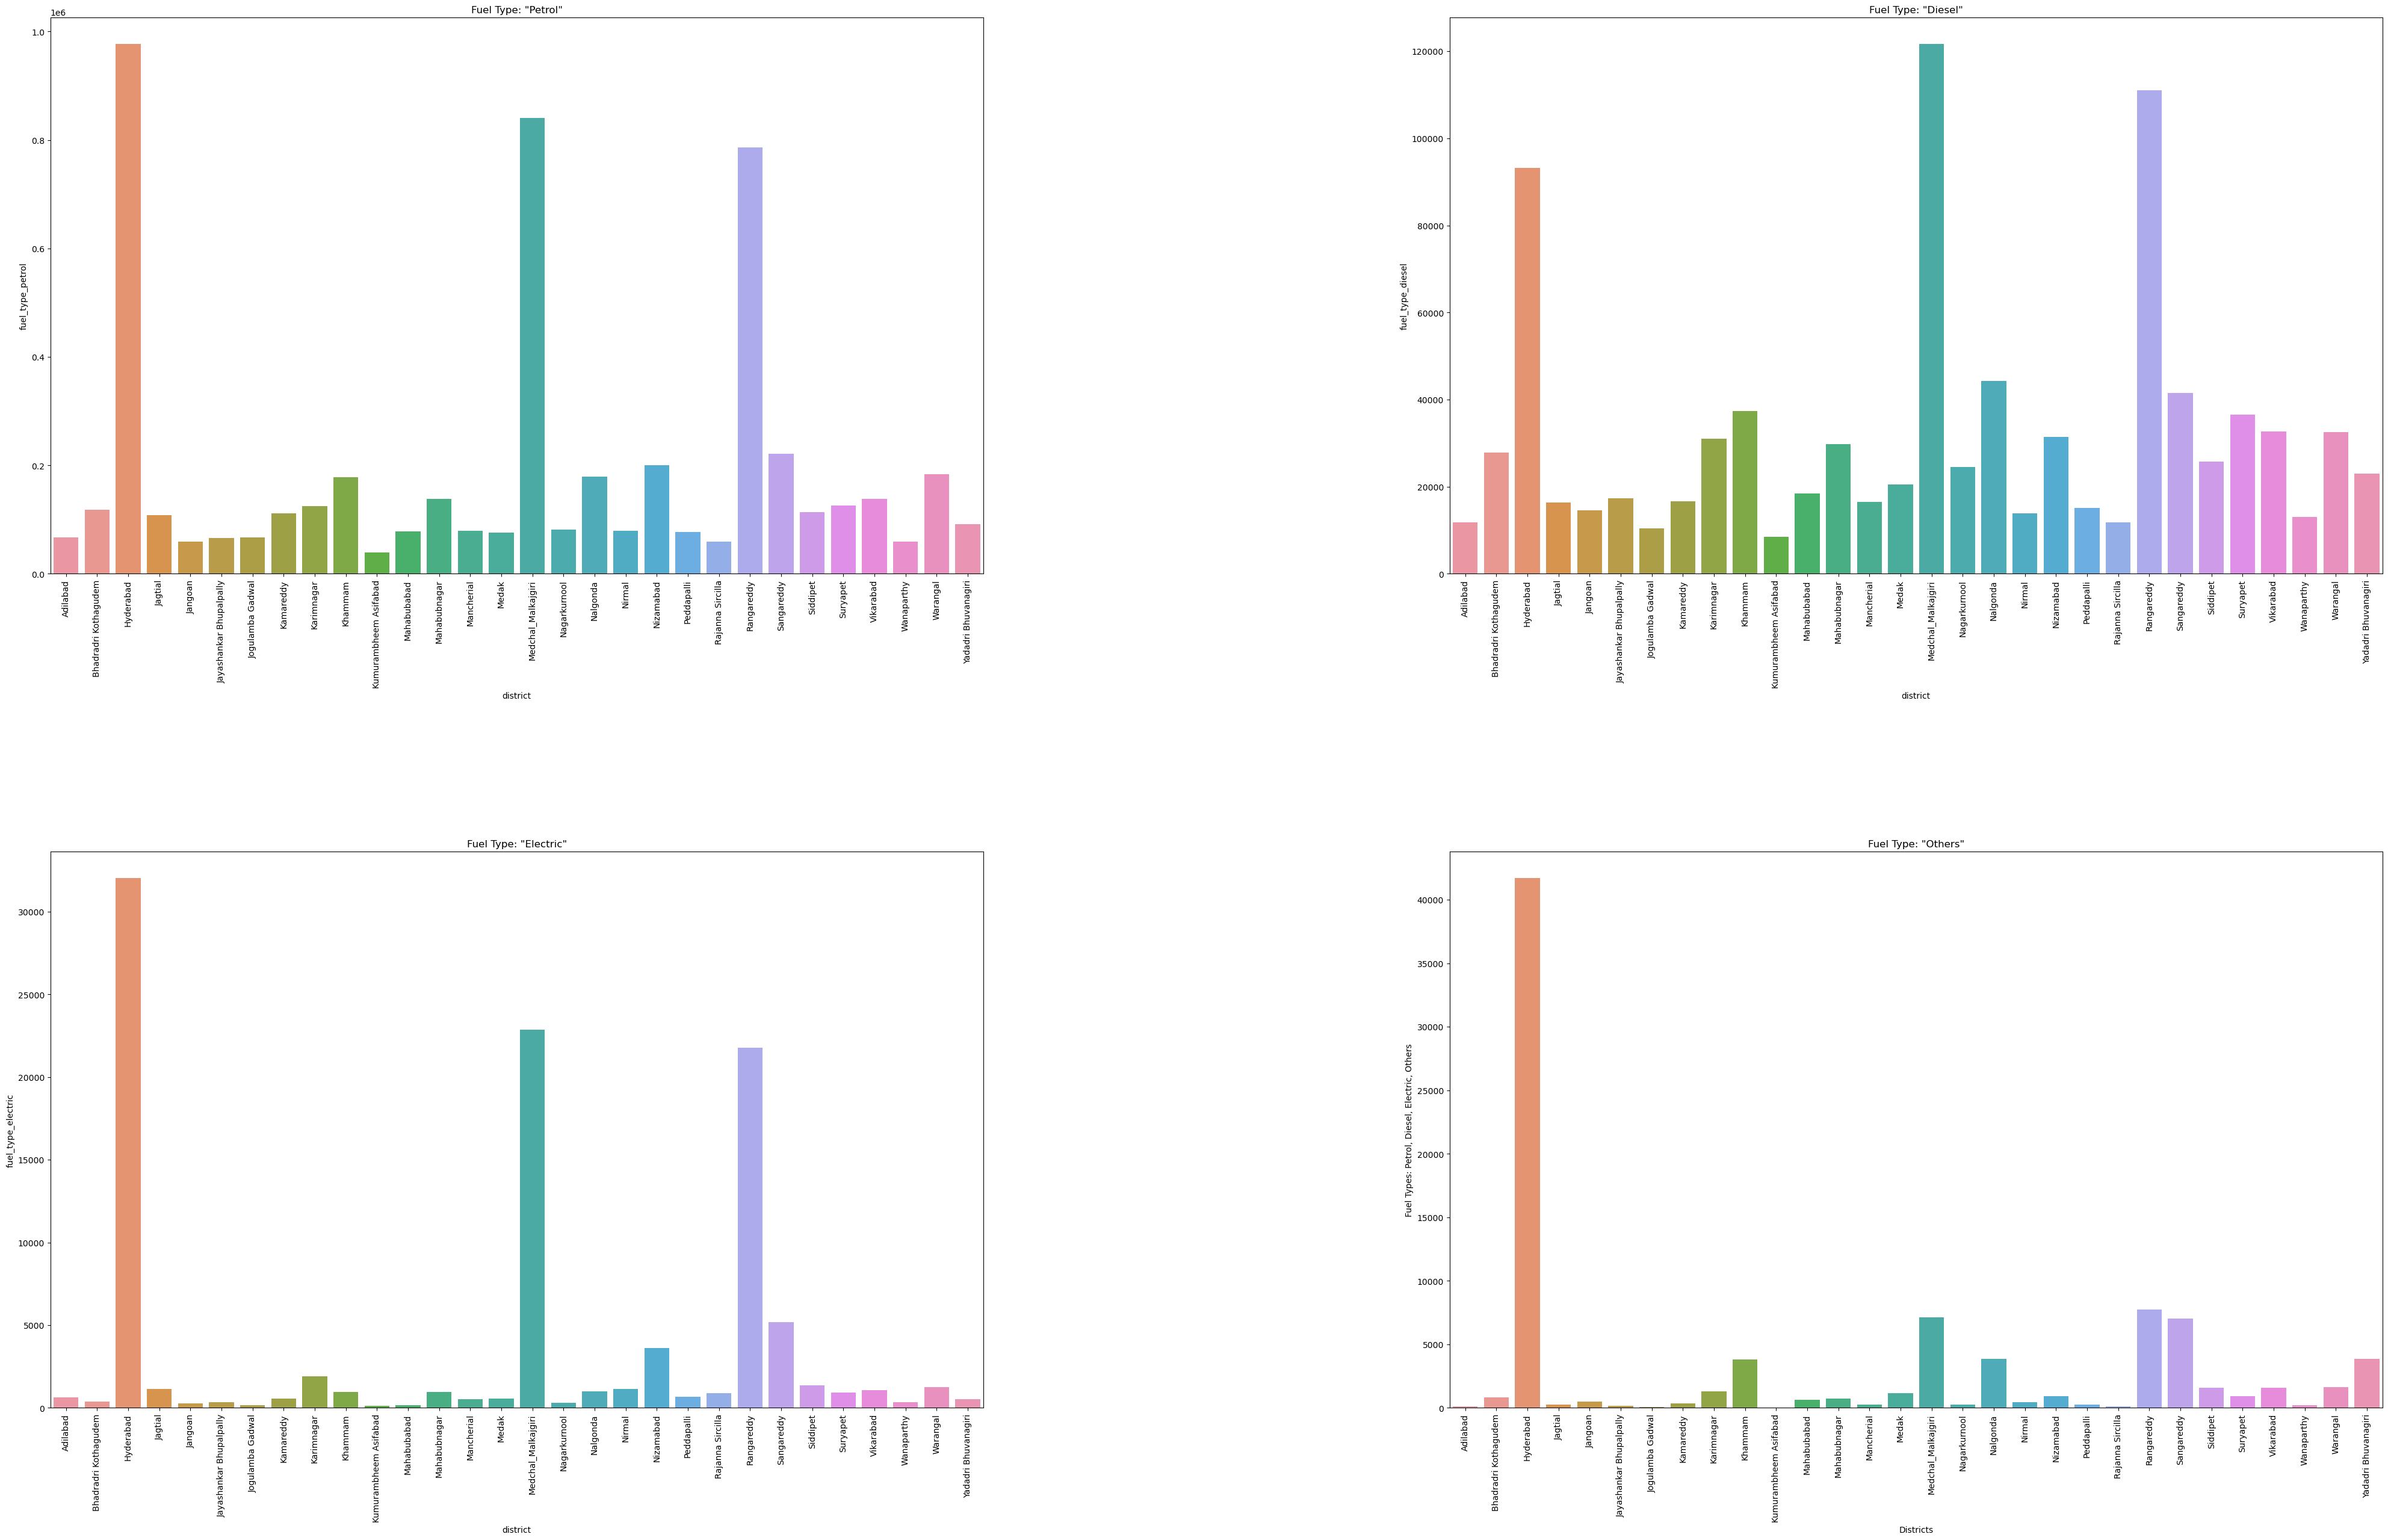

In [35]:
fig, axes = plt.subplots(2,2,figsize=(50,30))

sns.barplot(data=df05_02,x=df05_02['district'],y=df05_02['fuel_type_petrol'],label='Petrol',ax=axes[0,0])
axes[0,0].tick_params(axis='x',rotation=90)
axes[0,0].set_title('Fuel Type: "Petrol"')
sns.barplot(data=df05_02,x=df05_02['district'],y=df05_02['fuel_type_diesel'],label='Diesel',ax=axes[0,1])
axes[0,1].tick_params(axis='x',rotation=90)
axes[0,1].set_title('Fuel Type: "Diesel"')
sns.barplot(data=df05_02,x=df05_02['district'],y=df05_02['fuel_type_electric'],label='Electric',ax=axes[1,0])
axes[1,0].tick_params(axis='x',rotation=90)
axes[1,0].set_title('Fuel Type: "Electric"')
sns.barplot(data=df05_02,x=df05_02['district'],y=df05_02['fuel_type_others'],label='Others',ax=axes[1,1])
axes[1,1].tick_params(axis='x',rotation=90)
axes[1,1].set_title('Fuel Type: "Others"')

# plt.xticks(rotation=90)
# plt.xlim(left=2019)
plt.xlabel('Districts')
plt.ylabel('Fuel Types: Petrol, Diesel, Electric, Others')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

#### Insight:

> The above bargraphs will show the vehicle sales by fuel tye by each districts and also show the districts, which are out-performing and districts, which are showing the sales, which are some what same of each others.

#### (b)  correlation between vehicle sales and specific months or seasons in different districts. 

In [36]:
df05_03 = df05_01_ft.groupby(['month'], as_index=False).sum()
df05_03.head()

,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others
0,2019-04-01,140694,23098,477,1742
1,2019-05-01,143436,25605,287,1998
2,2019-06-01,141494,29331,328,1967
3,2019-07-01,131449,23550,383,2717
4,2019-08-01,126787,23525,256,2783


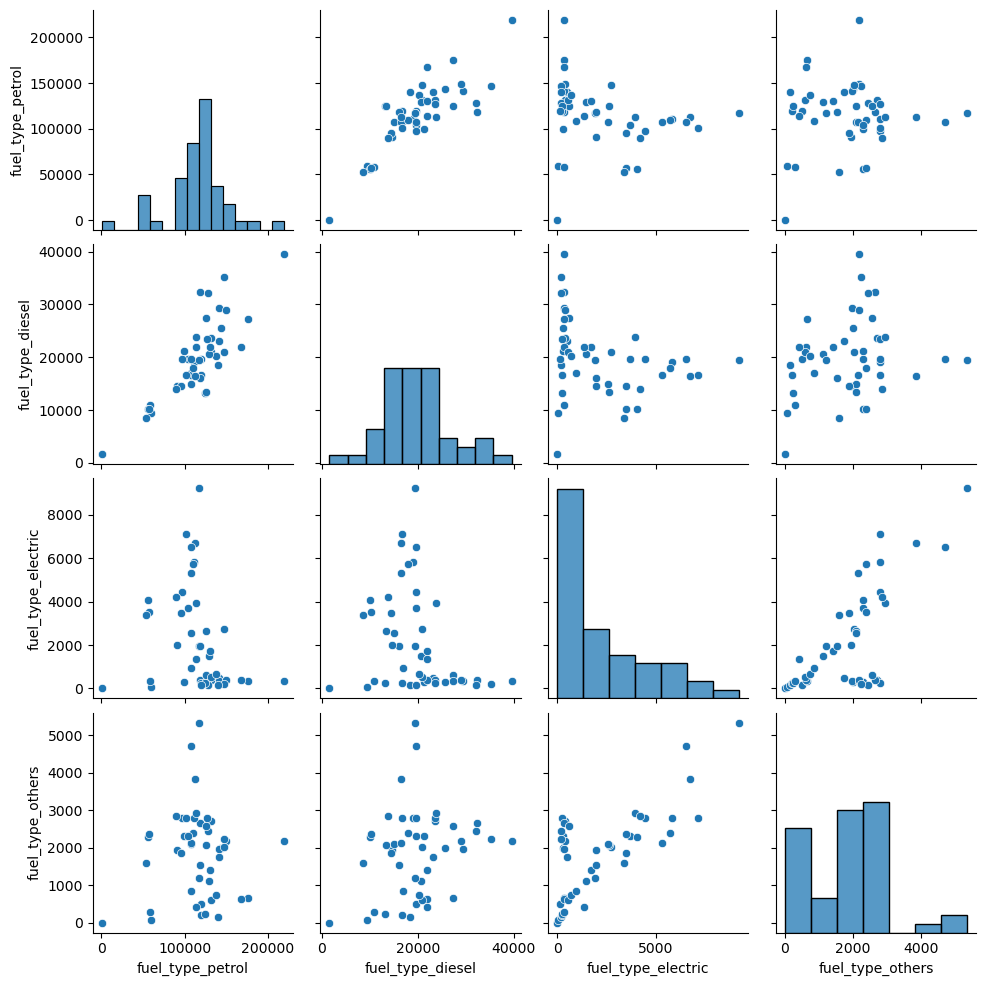

In [37]:
sns.pairplot(data=df05_03)
plt.show()

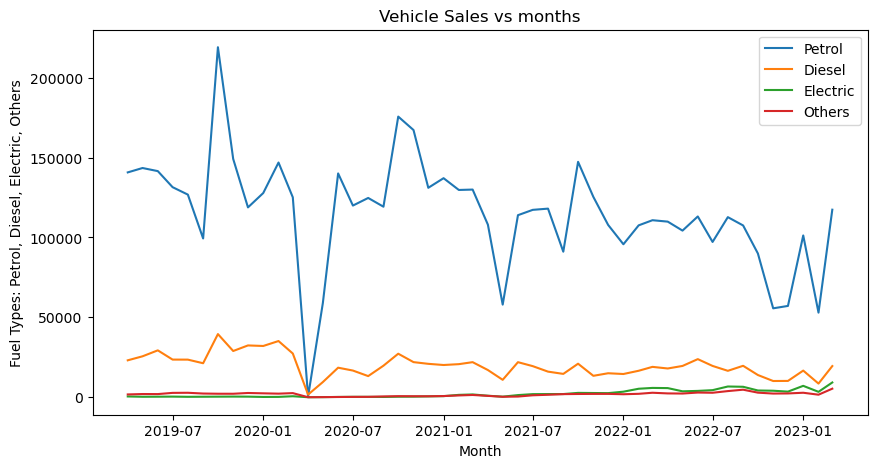

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df05_03,x=df05_03['month'],y=df05_03['fuel_type_petrol'],label='Petrol')
sns.lineplot(data=df05_03,x=df05_03['month'],y=df05_03['fuel_type_diesel'],label='Diesel')
sns.lineplot(data=df05_03,x=df05_03['month'],y=df05_03['fuel_type_electric'],label='Electric')
sns.lineplot(data=df05_03,x=df05_03['month'],y=df05_03['fuel_type_others'],label='Others')

plt.xlabel('Month')
plt.ylabel('Fuel Types: Petrol, Diesel, Electric, Others')
plt.title('Vehicle Sales vs months')
plt.show()

#### Insight:

> The above linegraph shows the vehicle sales by fuel type across Telangana state. 
>   1. Blue line shows sales of petrol vehicle sale and has higher sales in the state from the FY 2019 to 2022 except for March 2020, where sales of petrol vehicle has sharply declined and falls to the point where sales of all fuel type come to same point.
>   2. Orange line shows sales of diesel vehicles and takes at second place after petrol vehicle
>   3. Electric vehicle and other fuel type vehicles have same sales across the sate from the FY 2019 to 2022

#### Research Question 6. 
*
<font color='blue'>
How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.

In [39]:
# df_fact_transport_merged['year'] = df_fact_transport_merged['month'].dt.year
df_fact_transport_merged.head(1)

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district,Mmm,quarter,fiscal_year
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,...,4182,717,19542,1477,19856,1163,Rangareddy,Apr,Q1,2019


In [40]:
df06_vc = df_fact_transport_merged[['district','vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture','fiscal_year']]

In [41]:
df06_1 = df06_vc[(df06_vc['fiscal_year'] == 2022)]
df06_2 = df06_1.groupby('district')[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar','vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']].sum()
df06_2

,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture
district,,,,
Adilabad,10410,1416,368,467
Bhadradri Kothagudem,17022,3157,1388,2013
Hyderabad,206819,51447,8397,20
Jagtial,13639,2055,272,858
Jangoan,8617,1177,397,1225
Jayashankar Bhupalpally,9225,1343,218,1928
Jogulamba Gadwal,10300,899,116,868
Kamareddy,15184,2153,379,748
Karimnagar,19411,4818,1042,999


#### Insight:

>Above table shows the vehicle sales of different vehicle type such as Motor Cycle, Motor Car, AutoRickshaw, and Agriculture for fiscal year 2022.

#### Figure 6.1: Distribution of Vehicle Class: 'Motor Cycle' vs Districts

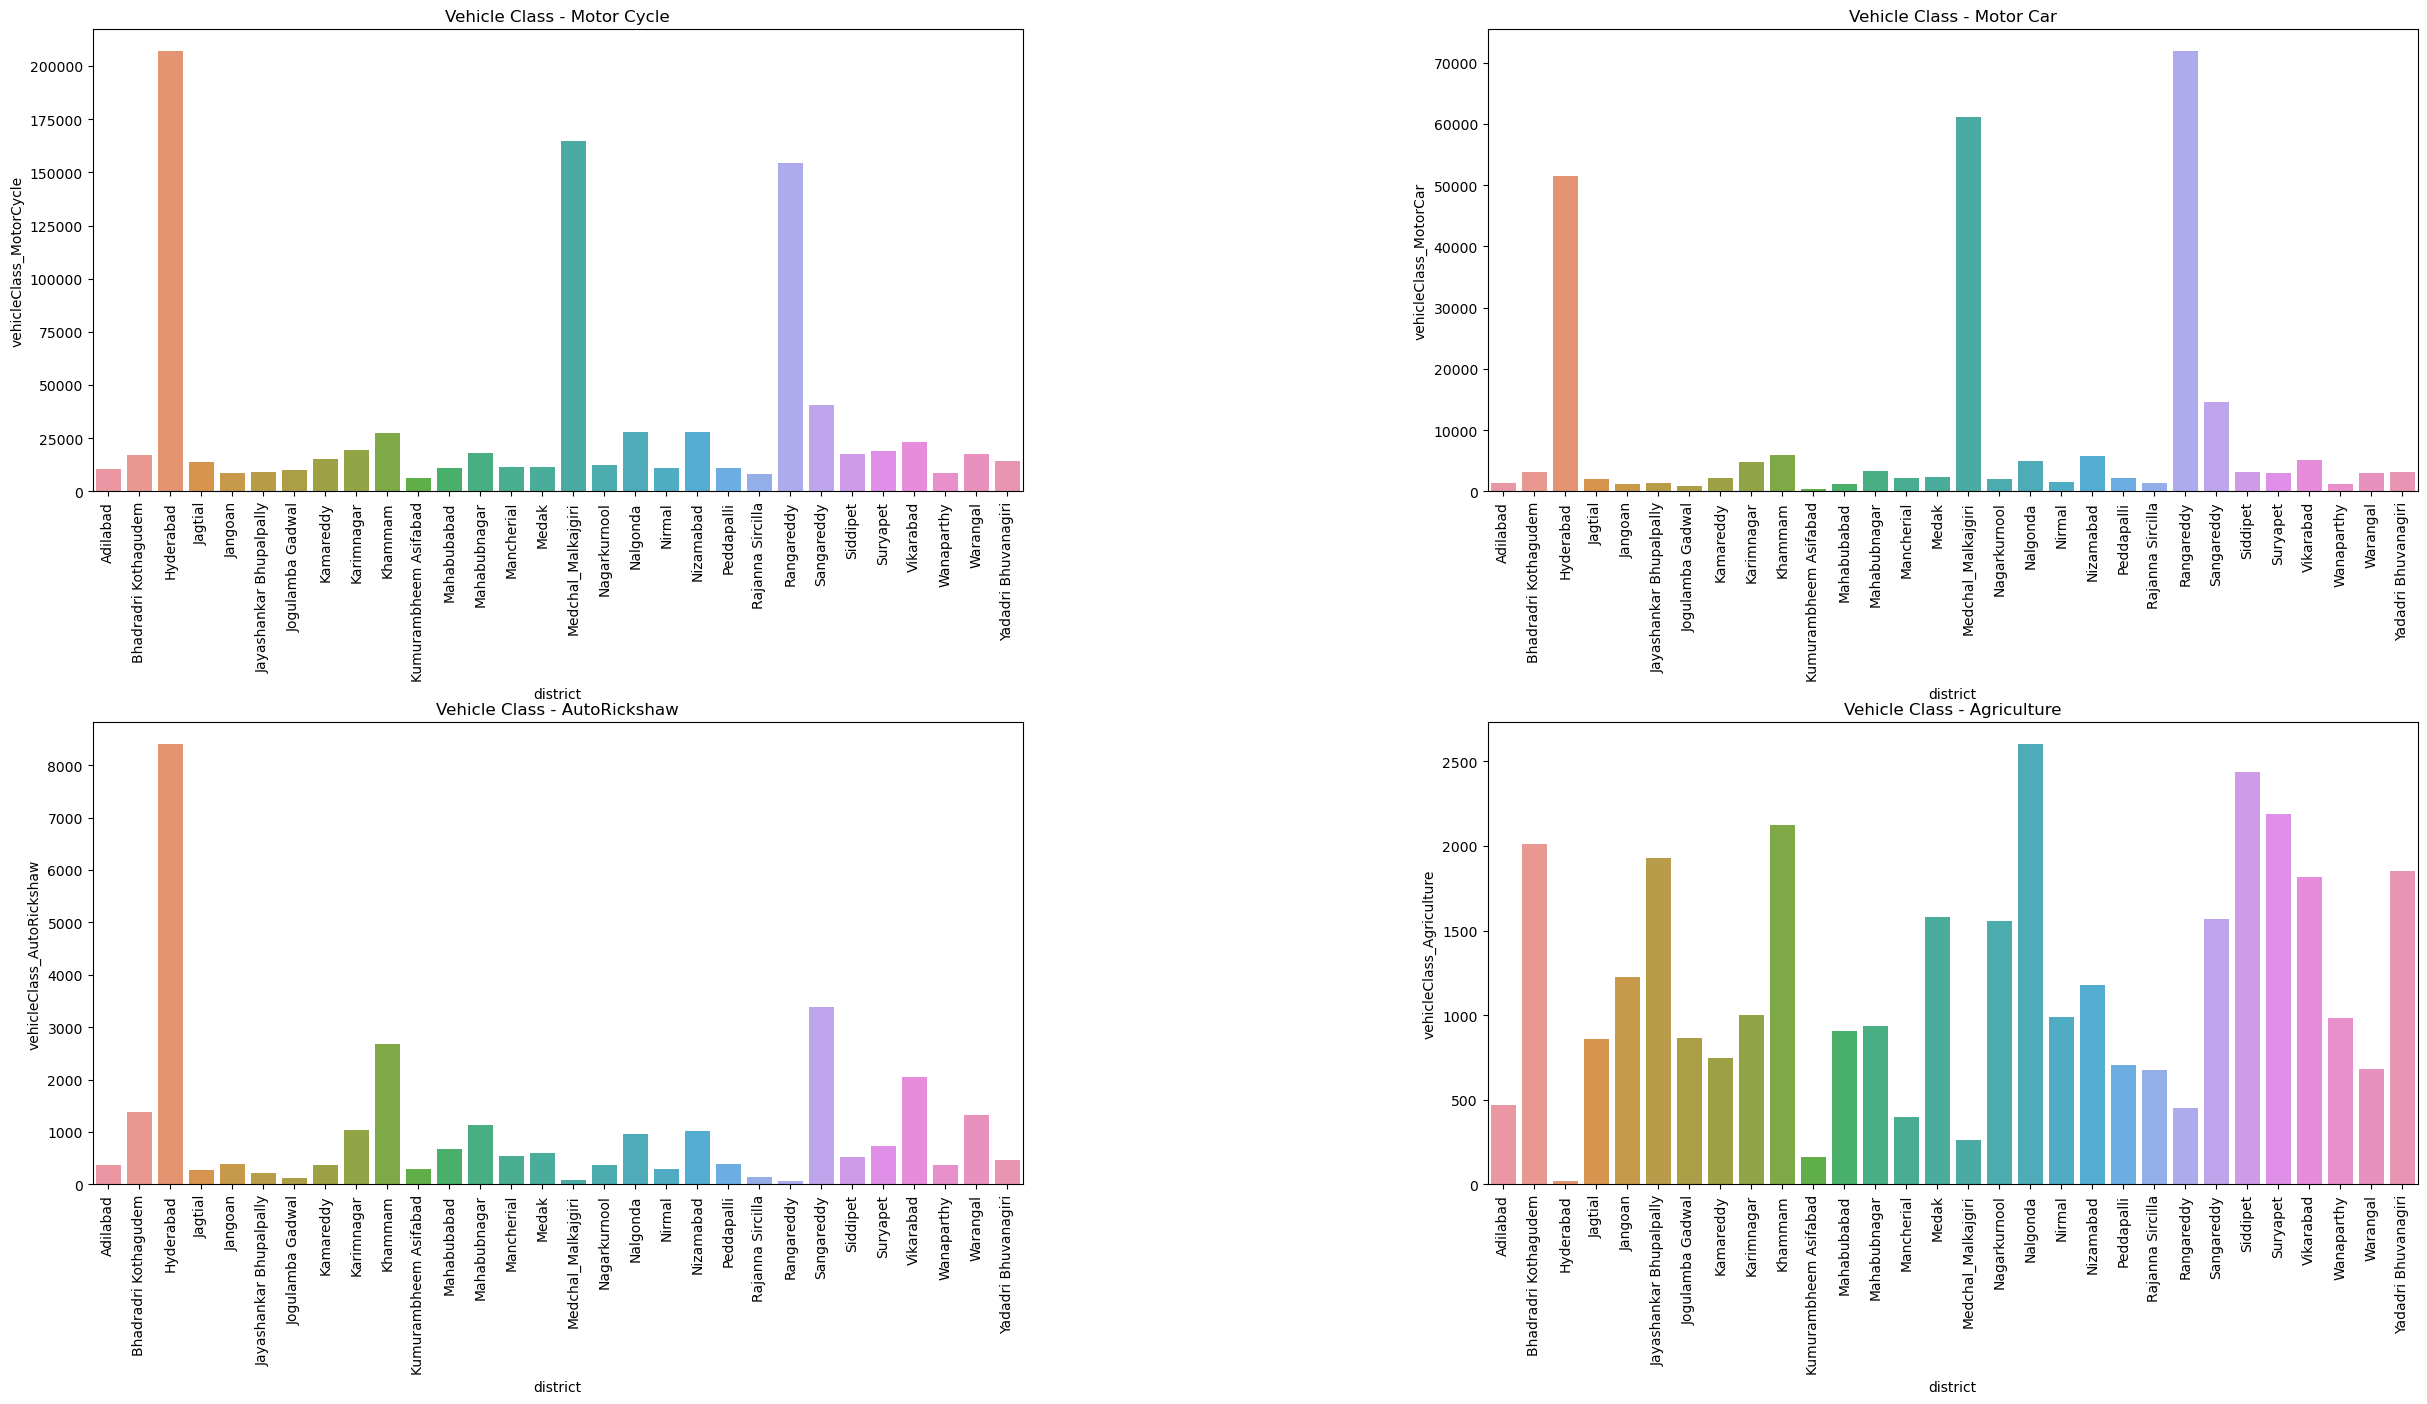

In [42]:
fig, axes = plt.subplots(2,2, figsize=(30,15))


sns.barplot(data=df06_2,x=df06_2.index,y=df06_2['vehicleClass_MotorCycle'], ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].set_title('Vehicle Class - Motor Cycle')

sns.barplot(data=df06_2,x=df06_2.index,y=df06_2['vehicleClass_MotorCar'], ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].set_title('Vehicle Class - Motor Car')

sns.barplot(data=df06_2,x=df06_2.index,y=df06_2['vehicleClass_AutoRickshaw'], ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_title('Vehicle Class - AutoRickshaw')

sns.barplot(data=df06_2,x=df06_2.index,y=df06_2['vehicleClass_Agriculture'], ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].set_title('Vehicle Class - Agriculture')

# plt.xticks(rotation=90)
# plt.xlabel('Districts in Telangana',fontsize=10)
# plt.ylabel('Vehicle Class: Motor Cycle',fontsize=10)
# plt.title('''Distribution of Vehicle Class: 'Motor Cycle' vs Districts FY-2022''',fontsize=10)

# for i,v in enumerate(df1['vehicleClass_MotorCycle']):
#     plt.text(i,v, str(v),ha='center', va='bottom', rotation=20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

#### Insight:

> The above is the graphical representation of the vehicle sales of all 4 vehicle classes such as Motor Cycle, Motor Car, AutoRickshaw, and Agriculture for fiscal year 2022.
> 1. Sales of 'Motor Cycle': Hyderbad, Medchal_Malkajgiri, and Rangareddy	are top disctricts.
> 2. Sales of 'Motor Car': Hyderbad, Medchal_Malkajgiri, and Rangareddy	are top disctricts.
> 3. Sales of 'Auto Rickshaw': Hyderbad is at the first place in autorickshaw sales
> 4. Sales of 'Agricultre' vehicle: Almost districts have good sales of agriculture vehicles. One observation, Hyderabad district has very less sale of agriculture vehicles. 

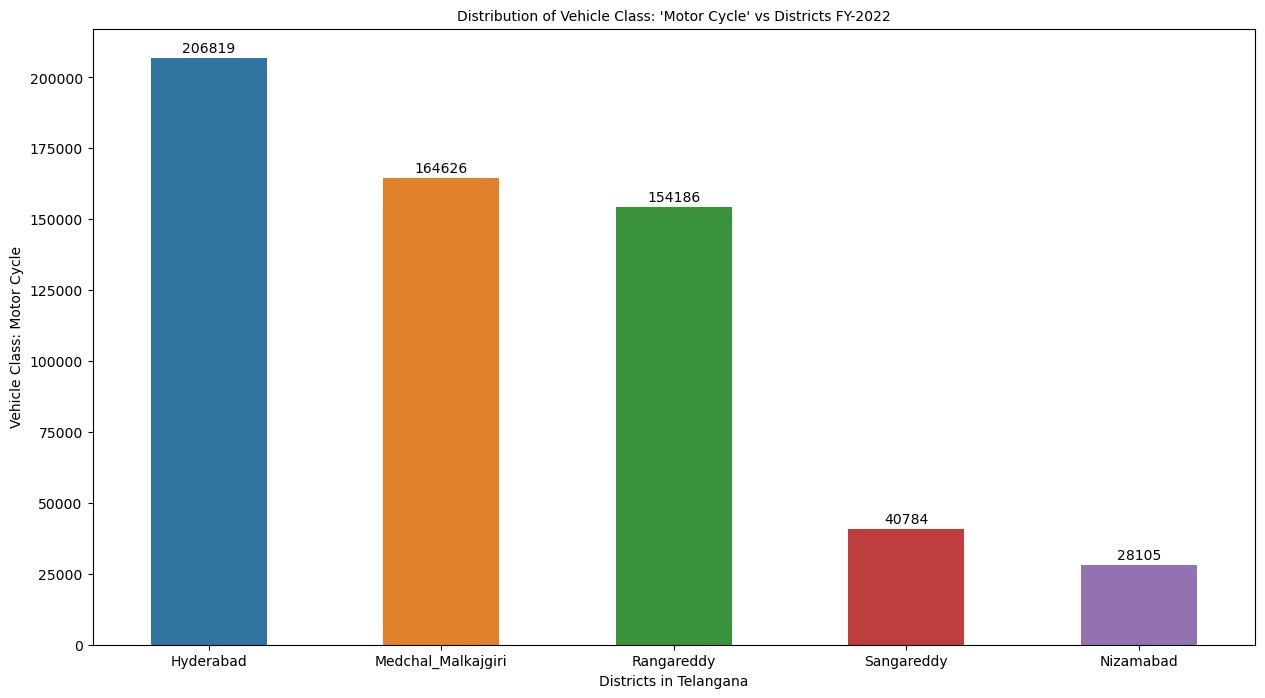

In [43]:
df1 = df06_2[['vehicleClass_MotorCycle']].sort_values(by='vehicleClass_MotorCycle',ascending=False).nlargest(5,'vehicleClass_MotorCycle')

plt.figure(figsize=(15,8))
sns.barplot(data=df1,x=df1.index,y=df1['vehicleClass_MotorCycle'], width=0.5)
# plt.xticks(rotation=90)
plt.xlabel('Districts in Telangana',fontsize=10)
plt.ylabel('Vehicle Class: Motor Cycle',fontsize=10)
plt.title('''Distribution of Vehicle Class: 'Motor Cycle' vs Districts FY-2022''',fontsize=10)

for i,v in enumerate(df1['vehicleClass_MotorCycle']):
    plt.text(i,v+1000, str(v),ha='center', va='bottom')
    
plt.show()

#### Figure 6.1: Distribution of Vehicle Class: 'Motor Cycle' vs Districts

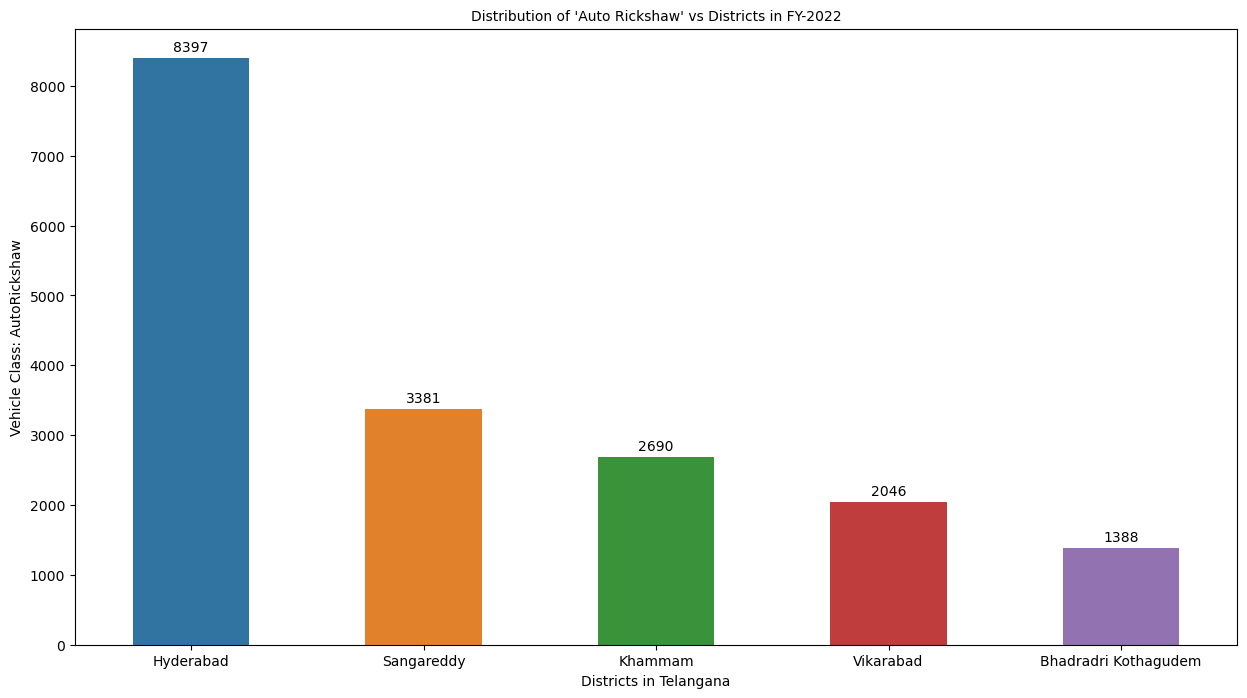

In [44]:
df2 = df06_2[['vehicleClass_AutoRickshaw']].sort_values(by='vehicleClass_AutoRickshaw',ascending=False).nlargest(5,'vehicleClass_AutoRickshaw')

plt.figure(figsize=(15,8))
sns.barplot(data=df2,x=df2.index,y=df2['vehicleClass_AutoRickshaw'], width=0.5)
# plt.xticks(rotation=90)
plt.xlabel('Districts in Telangana',fontsize=10)
plt.ylabel('Vehicle Class: AutoRickshaw',fontsize=10)
plt.title('''Distribution of 'Auto Rickshaw' vs Districts in FY-2022''',fontsize=10)

for i,v in enumerate(df2['vehicleClass_AutoRickshaw']):
    plt.text(i,v+50, str(v), ha='center', va='bottom')
plt.show()

#### Figure 6.2: Distribution of Vehicle Class: 'AutoRickshaw' vs 'Districts' in FY 2022

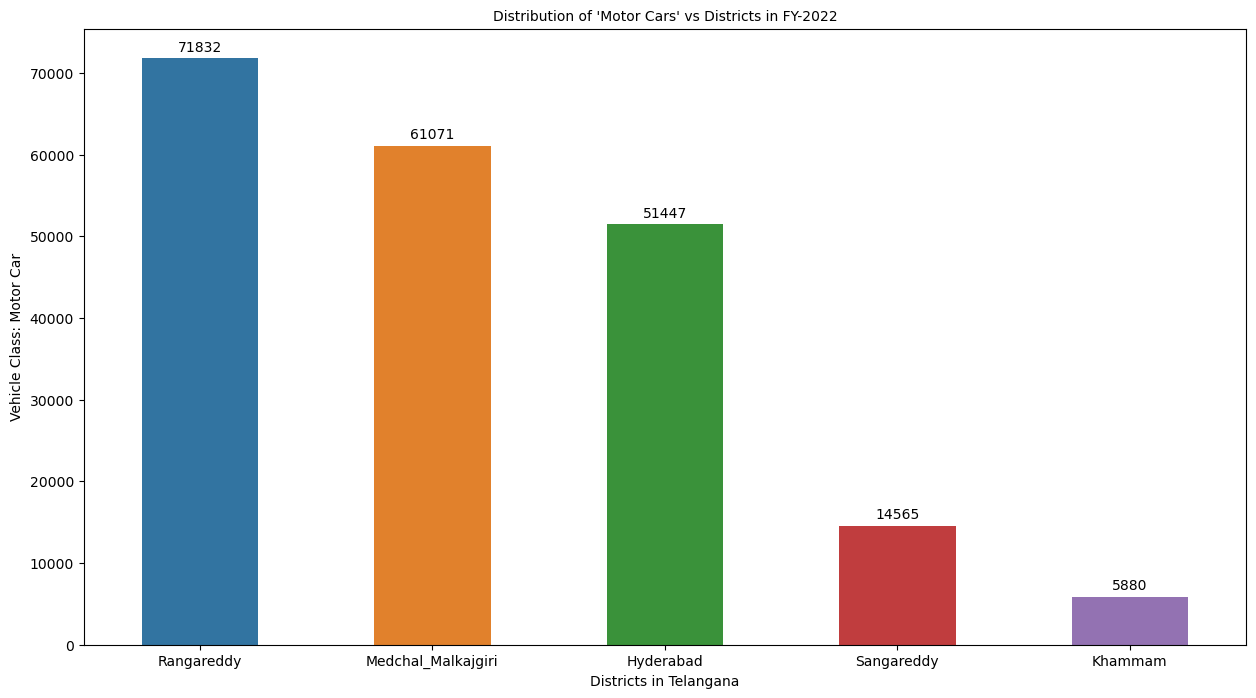

In [45]:
df3 = df06_2[['vehicleClass_MotorCar']].sort_values(by='vehicleClass_MotorCar',ascending=False).nlargest(5,'vehicleClass_MotorCar')

plt.figure(figsize=(15,8))
sns.barplot(data=df3,x=df3.index,y=df3['vehicleClass_MotorCar'], width=0.5)

for i,v in enumerate(df3['vehicleClass_MotorCar']):
    plt.text(i,v+500,str(v), ha='center', va='bottom')
plt.xlabel('Districts in Telangana',fontsize=10)
plt.ylabel('Vehicle Class: Motor Car',fontsize=10)
plt.title('''Distribution of 'Motor Cars' vs Districts in FY-2022''',fontsize=10)
plt.show()

#### Figure 6.3: Distribution of Vehicle Class: 'MotorCar' vs 'Districts' in FY 2022

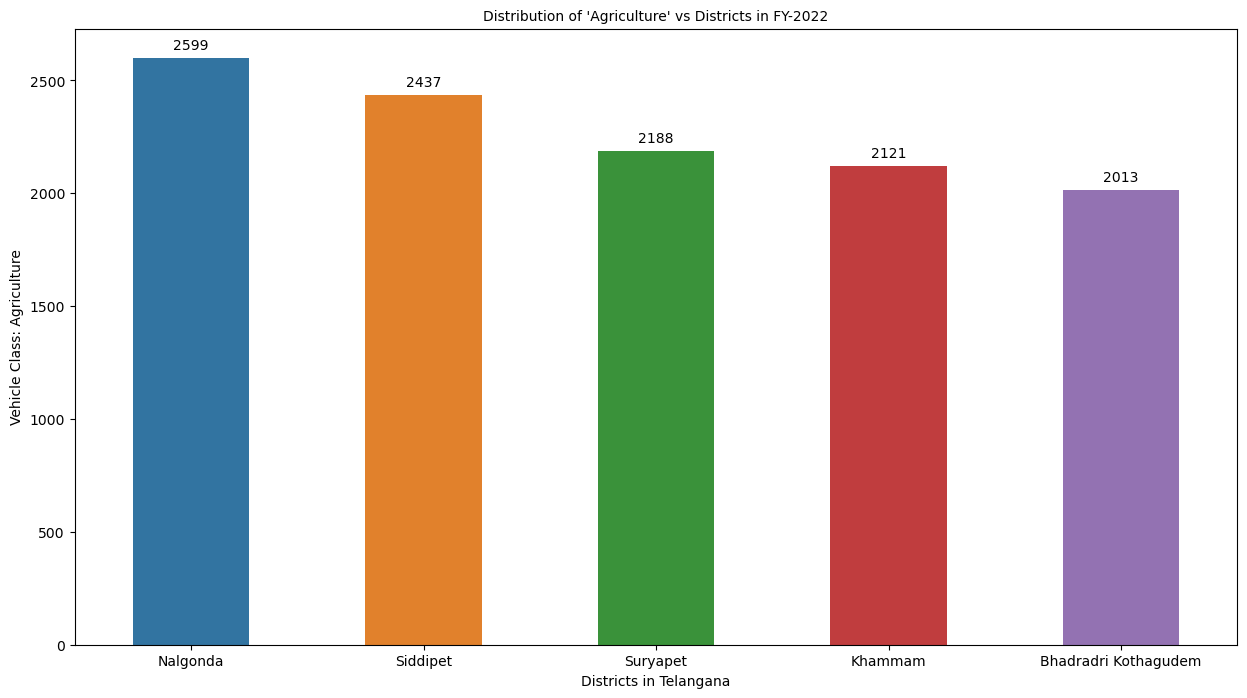

In [46]:
df4 = df06_2[['vehicleClass_Agriculture']].sort_values(by='vehicleClass_Agriculture',ascending=False).nlargest(5,'vehicleClass_Agriculture')

plt.figure(figsize=(15,8))
sns.barplot(data=df4,x=df4.index,y=df4['vehicleClass_Agriculture'], width=0.5)
# plt.xticks(rotation=90)
plt.xlabel('Districts in Telangana',fontsize=10)
plt.ylabel('Vehicle Class: Agriculture',fontsize=10)
plt.title('''Distribution of 'Agriculture' vs Districts in FY-2022''',fontsize=10)

for i,v in enumerate(df4['vehicleClass_Agriculture']):
    plt.text(i,v+25, str(v), ha='center', va='bottom')
plt.show()

#### Figure 6.4: Distribution of Vehicle Class: 'Agriculture' vs 'Districts' in FY 2022

#### Research Question 7:

List down the top 3 and bottom 3 districts that have shown the highest and lowest vehicle sales growth during FY 2022 compared to FY 2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [47]:
df_ftrans = df_fact_transport_merged[['district','fuel_type_petrol', 'fuel_type_diesel','fuel_type_electric','fiscal_year']]
df_ftrans_f = df_ftrans[df_ftrans['fiscal_year'].isin([2021,2022])].copy()
df_ftrans_f.head()

,district,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fiscal_year
720,Rangareddy,14342,1948,240,2021
721,Kamareddy,2120,253,8,2021
722,Rajanna Sircilla,1073,195,2,2021
723,Jangoan,990,285,0,2021
724,Jayashankar Bhupalpally,1750,360,10,2021


In [48]:
df_ftrans_f.rename(columns={'fuel_type_petrol':'petrol','fuel_type_diesel':'diesel','fuel_type_electric':'electric'},inplace=True)
df_ftrans_f.head()

,district,petrol,diesel,electric,fiscal_year
720,Rangareddy,14342,1948,240,2021
721,Kamareddy,2120,253,8,2021
722,Rajanna Sircilla,1073,195,2,2021
723,Jangoan,990,285,0,2021
724,Jayashankar Bhupalpally,1750,360,10,2021


In [49]:
df_ftrans_f[(df_ftrans_f['district'] == 'Adilabad') & (df_ftrans_f['fiscal_year'] == 2021)].groupby(['district','fiscal_year']).sum() # upto here 

,,petrol,diesel,electric
district,fiscal_year,,,
Adilabad,2021,16592,2267,277


In [50]:
df_melted = pd.melt(df_ftrans_f,id_vars=['district','fiscal_year'],var_name='fuel_type',value_name='sales')
df_melted.head(5)

,district,fiscal_year,fuel_type,sales
0,Rangareddy,2021,petrol,14342
1,Kamareddy,2021,petrol,2120
2,Rajanna Sircilla,2021,petrol,1073
3,Jangoan,2021,petrol,990
4,Jayashankar Bhupalpally,2021,petrol,1750


In [51]:
df_melted[(df_melted['fiscal_year'] == 2021) & (df_melted['district'] == 'Adilabad')].groupby(['district','fuel_type','fiscal_year']).sum() #upto here sales are correct

sales
district fuel_type fiscal_year       
Adilabad diesel    2021          2267
         electric  2021           277
         petrol    2021         16592

In [52]:
# pivoting the year of the dataframe

df_ftrans_pivot = df_melted.pivot_table(index=['district','fuel_type'],columns=['fiscal_year'],values='sales', aggfunc=np.sum, fill_value=0).reset_index()
df_ftrans_pivot.head()

fiscal_year,district,fuel_type,2021,2022
0,Adilabad,diesel,2267,2523
1,Adilabad,electric,277,333
2,Adilabad,petrol,16592,11212
3,Bhadradri Kothagudem,diesel,5739,5712
4,Bhadradri Kothagudem,electric,76,290


In [53]:
df_ftrans_pivot[df_ftrans_pivot['district'] == 'Adilabad']

fiscal_year,district,fuel_type,2021,2022
0,Adilabad,diesel,2267,2523
1,Adilabad,electric,277,333
2,Adilabad,petrol,16592,11212


In [54]:
df_ftrans_pivot['growth'] = df_ftrans_pivot[2022] - df_ftrans_pivot[2021]
df_ftrans_pivot['growth %'] = round(((df_ftrans_pivot[2022] - df_ftrans_pivot[2021])/df_ftrans_pivot[2021])*100,2)
df_ftrans_pivot

fiscal_year,district,fuel_type,2021,2022,growth,growth %
0,Adilabad,diesel,2267,2523,256,11.29
1,Adilabad,electric,277,333,56,20.22
2,Adilabad,petrol,16592,11212,-5380,-32.43
3,Bhadradri Kothagudem,diesel,5739,5712,-27,-0.47
4,Bhadradri Kothagudem,electric,76,290,214,281.58
...,...,...,...,...,...,...
85,Warangal,electric,419,649,230,54.89
86,Warangal,petrol,36035,19704,-16331,-45.32
87,Yadadri Bhuvanagiri,diesel,4878,4805,-73,-1.50
88,Yadadri Bhuvanagiri,electric,229,277,48,20.96


In [55]:
# top & bottom 3 distircts by sales growth % by fuel type

In [56]:
df1 = df_ftrans_pivot[df_ftrans_pivot['fuel_type'].str.contains('petrol')].nlargest(3,'growth %')
df1

fiscal_year,district,fuel_type,2021,2022,growth,growth %
68,Rangareddy,petrol,184204,200289,16085,8.73
8,Hyderabad,petrol,228817,231166,2349,1.03
47,Medchal_Malkajgiri,petrol,201947,200121,-1826,-0.90


#### Insight:

> Rangareddy, Hyderabad, and Medchal_Malkajgiri are the top 3 districts in highest vehicle sales growth during FY 2022 compared to FY 2021. The above table shows the top 3 districts by fuel type 'Petrol'.

In [57]:
df_low = df_ftrans_pivot[df_ftrans_pivot['fuel_type'].str.contains('petrol')].nsmallest(3,'growth %')
df_low

fiscal_year,district,fuel_type,2021,2022,growth,growth %
86,Warangal,petrol,36035,19704,-16331,-45.32
56,Nirmal,petrol,19746,11640,-8106,-41.05
11,Jagtial,petrol,24945,14836,-10109,-40.53


#### Insight:

> Warangal, Nirmal, and Jagtial are the bottom 3 districts in vehicle sales growth during FY 2022 compared to FY 2021. The above table shows the bottom 3 districts by fuel type 'Petrol'.

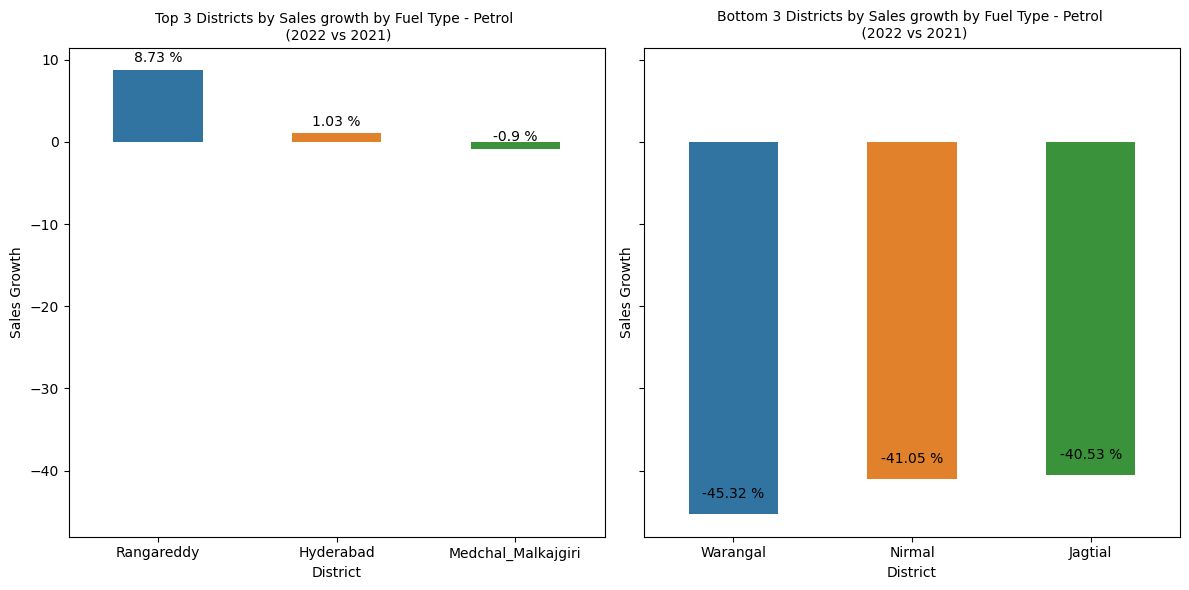

In [58]:
fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
sns.barplot(data=df1,x=df1['district'],y=df1['growth %'],ax=axes[0], width=0.5)
axes[0].set_title('''Top 3 Districts by Sales growth by Fuel Type - Petrol \n (2022 vs 2021)''', fontsize=10,y=1.005, wrap=True)
axes[0].set_xlabel('District')
axes[0].set_ylabel('Sales Growth')
# axes[0].tick_params(axis='x',rotation=90)

for i,v in enumerate(df1['growth %']):
    axes[0].text(i,v+2.30,str(v)+' %',ha='center',va='top')

sns.barplot(data=df_low,x=df_low['district'],y=df_low['growth %'],ax=axes[1], width=0.5)
axes[1].set_title('''Bottom 3 Districts by Sales growth by Fuel Type - Petrol \n (2022 vs 2021)''', fontsize=10, y=1.005)
axes[1].set_xlabel('District')
axes[1].set_ylabel('Sales Growth')
# axes[1].tick_params(axis='x',rotation=90)

for i,v in enumerate(df_low['growth %']):
    axes[1].text(i,v+2,str(v)+' %',ha='center',va='baseline')

plt.tight_layout()
plt.show()

#### Figure 7.1: Top 3 & Bottom 3 disctricts by fuel type 'Petrol' 

#### Insight:

> The above graphs are the visual representation the top 3 and bottom 3 districts by sales growth for fiscal year 2022 in comparison to fiscal year 2021 for fuel type 'Petrol'

In [59]:
# Top 3 Districts by Fuel Type: 'Diesel' and Sales Growth of fy 2022 wrt fy 2021

df2 = df_ftrans_pivot[df_ftrans_pivot['fuel_type'].str.contains('diesel')].nlargest(3,'growth')
df2

fiscal_year,district,fuel_type,2021,2022,growth,growth %
24,Karimnagar,diesel,5034,10644,5610,111.44
66,Rangareddy,diesel,24711,27843,3132,12.67
69,Sangareddy,diesel,8193,9275,1082,13.21


#### Insight:

> Karimnagar, Rangareddy, and Sangareddy are the top 3 districts in highest vehicle sales growth during FY 2022 compared to FY 2021. The above table shows the top 3 districts by fuel type 'Diesel'.

In [60]:
# Bottom 3 Districts by Fuel Type: 'Diesel' and Sales Growth of fy 2022 wrt fy 2021

df2_low = df_ftrans_pivot[df_ftrans_pivot['fuel_type'].str.contains('diesel')].nsmallest(3,'growth')
df2_low

fiscal_year,district,fuel_type,2021,2022,growth,growth %
84,Warangal,diesel,5717,2971,-2746,-48.03
51,Nalgonda,diesel,9212,7840,-1372,-14.89
36,Mahabubnagar,diesel,6029,4790,-1239,-20.55


#### Insight:

> Warangal, Nalgonda, and Mahabubnagar are the bottom 3 districts in vehicle sales growth during FY 2022 compared to FY 2021. The above table shows the bottom 3 districts by fuel type 'Diesel'.

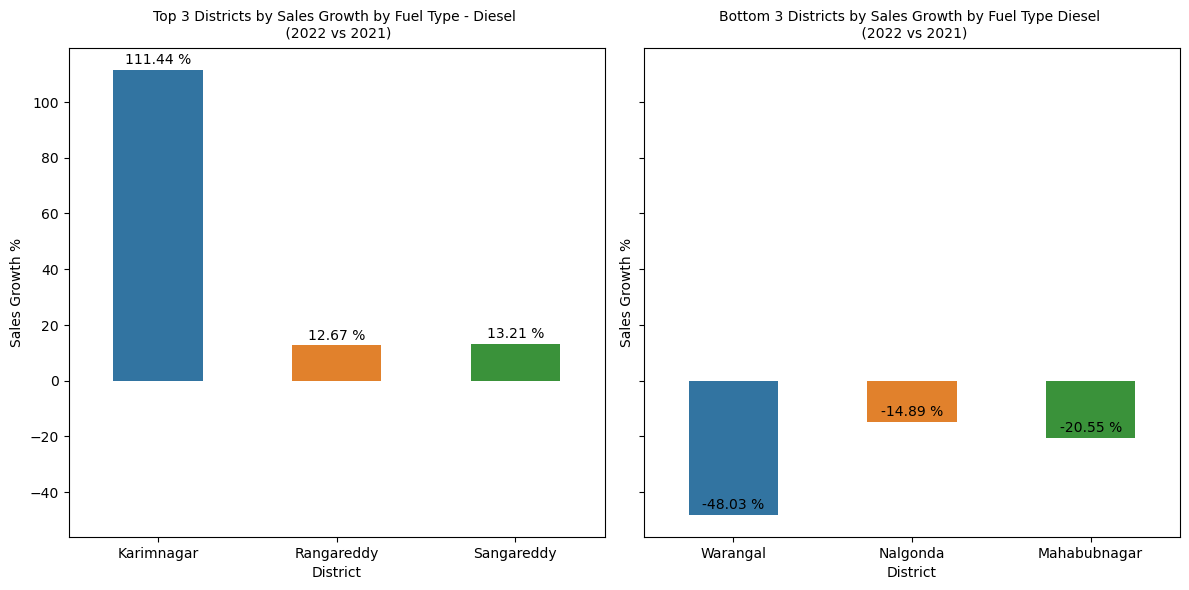

In [61]:
fig,axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
sns.barplot(data=df2,x=df2['district'],y=df2['growth %'],ax=axes[0], width=0.5)
axes[0].set_title('''Top 3 Districts by Sales Growth by Fuel Type - Diesel \n (2022 vs 2021)''', fontsize=10, y=1.005)
axes[0].set_xlabel('District')
axes[0].set_ylabel('Sales Growth %')
# axes[0].tick_params(axis='x',rotation=90)

for i,v in enumerate(df2['growth %']):
    axes[0].text(i,v+1,str(v)+' %', ha='center', va='bottom')

sns.barplot(data=df2_low,x=df2_low['district'],y=df2_low['growth %'],ax=axes[1], width=0.5)
axes[1].set_title('''Bottom 3 Districts by Sales Growth by Fuel Type Diesel \n (2022 vs 2021)''', fontsize=10, y=1.005)
axes[1].set_xlabel('District')
axes[1].set_ylabel('Sales Growth %')
# axes[1].tick_params(axis='x',rotation=90)

for i,v in enumerate(df2_low['growth %']):
    axes[1].text(i,v+1,str(v)+' %', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Figure 7.2: Top 3 & Bottom 3 Districts by Fuel Type: 'Diesel' and Sales Growth of fy 2022 wrt fy 2021

#### Insight:

> The above graphs are the visual representation the top 3 and bottom 3 districts by sales growth for fiscal year 2022 in comparison to fiscal year 2021 for fuel type 'Diesel'

In [62]:
df3_top3 = df_ftrans_pivot[df_ftrans_pivot['fuel_type'].str.contains('electric')].nlargest(3,'growth %')
df3_top3

fiscal_year,district,fuel_type,2021,2022,growth,growth %
28,Khammam,electric,149,759,610,409.40
4,Bhadradri Kothagudem,electric,76,290,214,281.58
76,Suryapet,electric,193,670,477,247.15


#### Insight:

> Khammam, Bhadradri Kothagudem, and Suryapet are the top 3 districts in vehicle sales growth during FY 2022 compared to FY 2021. The above table shows the top 3 districts by fuel type 'Electric'.

In [63]:
df3_bot3 = df_ftrans_pivot[df_ftrans_pivot['fuel_type'].str.contains('electric')].nsmallest(3,'growth %')
df3_bot3

fiscal_year,district,fuel_type,2021,2022,growth,growth %
82,Wanaparthy,electric,146,154,8,5.48
64,Rajanna Sircilla,electric,362,416,54,14.92
40,Mancherial,electric,198,236,38,19.19


#### Insight:

> Wanaparthy, Rajanna Sircilla, and Mancherial are the bottom 3 districts in vehicle sales growth during FY 2022 compared to FY 2021. The above table shows the bottom 3 districts by fuel type 'Electric'.

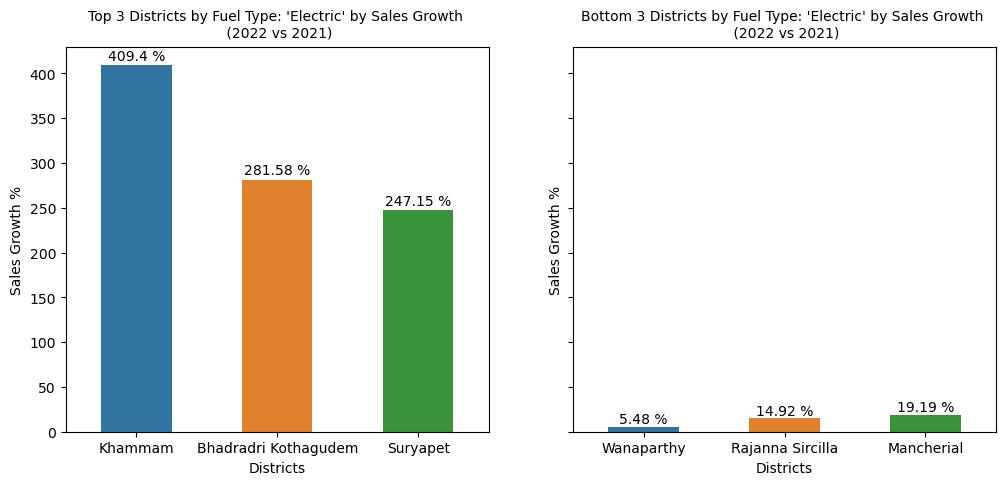

In [64]:
fig, axes = plt.subplots(1,2,figsize=(12,5), sharey=True)

sns.barplot(data=df3_top3,x=df3_top3['district'],y=df3_top3['growth %'], ax=axes[0], width=0.5)
axes[0].set_xlabel('Districts')
axes[0].set_ylabel('Sales Growth %')
axes[0].set_title('''Top 3 Districts by Fuel Type: 'Electric' by Sales Growth \n (2022 vs 2021)''', fontsize=10, y=1.005)

for i,v in enumerate(df3_top3['growth %']):
    axes[0].text(i,v+2,str(v)+' %',ha='center',va='bottom')

sns.barplot(data=df3_bot3,x=df3_bot3['district'],y=df3_bot3['growth %'], ax=axes[1], width=0.5)
axes[1].set_xlabel('Districts')
axes[1].set_ylabel('Sales Growth %')
axes[1].set_title('''Bottom 3 Districts by Fuel Type: 'Electric' by Sales Growth \n (2022 vs 2021)''', fontsize=10, y=1.005)

for i,v in enumerate(df3_bot3['growth %']):
    axes[1].text(i, v+0.1, str(v)+' %', ha='center', va='bottom')

plt.show()

#### Figure 7.3: Top 3 & Bottom 3 Districts by Fuel Type: 'Electric' and Sales Growth of fy 2022 wrt fy 2021

#### Insight:

> The above graphs are the visual representation the top 3 and bottom 3 districts by sales growth for fiscal year 2022 in comparison to fiscal year 2021 for fuel type 'Electric'

----

## 3. Ts-Ipass (Telangana State Industrial Project Approval and Self Certification System)

In [65]:
df_TS_iPASS_merge = pd.merge(df_fact_TS_iPASS,df_dim_districts,how='inner',on='dist_code')
df_TS_iPASS_merge.head(3)

,dist_code,month,sector,investment in cr,number_of_employees,district
0,14_1,01-04-2019,Engineering,2.32,15,Mahabubnagar
1,14_1,01-04-2019,Paper and Printing,14.40,305,Mahabubnagar
2,14_1,01-05-2019,Pharmaceuticals and Chemicals,66.90,190,Mahabubnagar


In [66]:
df_dm_date['month'] = pd.to_datetime(df_dm_date['month'])
df_dm_date.head(3)
# df_dm_date.info()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019


In [67]:
df_TS_iPASS_merge['month'] = pd.to_datetime(df_TS_iPASS_merge['month'],format='%d-%m-%Y')
df_TS_iPASS_merge.head(3)
# df_TS_iPASS_merged.info()

,dist_code,month,sector,investment in cr,number_of_employees,district
0,14_1,2019-04-01,Engineering,2.32,15,Mahabubnagar
1,14_1,2019-04-01,Paper and Printing,14.40,305,Mahabubnagar
2,14_1,2019-05-01,Pharmaceuticals and Chemicals,66.90,190,Mahabubnagar


In [68]:
df_TS_iPASS_merged = pd.merge(df_TS_iPASS_merge,df_dm_date,how='inner',on='month')
df_TS_iPASS_merged.head(3)

,dist_code,month,sector,investment in cr,number_of_employees,district,Mmm,quarter,fiscal_year
0,14_1,2019-04-01,Engineering,2.320,15,Mahabubnagar,Apr,Q1,2019
1,14_1,2019-04-01,Paper and Printing,14.400,305,Mahabubnagar,Apr,Q1,2019
2,19_1,2019-04-01,Engineering,0.625,13,Adilabad,Apr,Q1,2019


------------

#### Research Question 8:

List down the top 5 sectors that have witnessed the most significant investments in FY 2022.

In [69]:
# df_TS_iPASS_merged['year'] = df_TS_iPASS_merged['month'].dt.year
# df_TS_iPASS_merged['year'] = df_TS_iPASS_merged['fiscal_year']

In [70]:
df_TS_iPASS_merged.head()

,dist_code,month,sector,investment in cr,number_of_employees,district,Mmm,quarter,fiscal_year
0,14_1,2019-04-01,Engineering,2.3200,15,Mahabubnagar,Apr,Q1,2019
1,14_1,2019-04-01,Paper and Printing,14.4000,305,Mahabubnagar,Apr,Q1,2019
2,19_1,2019-04-01,Engineering,0.6250,13,Adilabad,Apr,Q1,2019
3,19_1,2019-04-01,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99,Adilabad,Apr,Q1,2019
4,19_1,2019-04-01,Food Processing,0.0980,7,Adilabad,Apr,Q1,2019


In [71]:
df_ts_8_1 = df_TS_iPASS_merged[(df_TS_iPASS_merged['fiscal_year'] == 2022)]
df_ts_8_1.head()

,dist_code,month,sector,investment in cr,number_of_employees,district,Mmm,quarter,fiscal_year
4320,14_1,2022-04-01,Pharmaceuticals and Chemicals,35.000,450,Mahabubnagar,Apr,Q1,2022
4321,14_1,2022-04-01,Others,47.000,60,Mahabubnagar,Apr,Q1,2022
4322,14_1,2022-04-01,Food Processing,6.000,5,Mahabubnagar,Apr,Q1,2022
4323,14_1,2022-04-01,Agro based incl Cold Storages,26.855,64,Mahabubnagar,Apr,Q1,2022
4324,14_1,2022-04-01,Solar and Other Renewable Energy,590.654,45,Mahabubnagar,Apr,Q1,2022


In [72]:
df_ts_8_2 = df_ts_8_1.groupby('sector')[['investment in cr']].sum().nlargest(5,'investment in cr')
df_ts_8_2

,investment in cr
sector,
Plastic and Rubber,5855.6095
Pharmaceuticals and Chemicals,2181.6342
"Real Estate,Industrial Parks and IT Buildings",2127.2963
Solar and Other Renewable Energy,2052.9850
Engineering,1877.4533


#### Insight:

> The above table shows the list of the top 5 sectors that have witnessed the most significant investments in FY 2022.

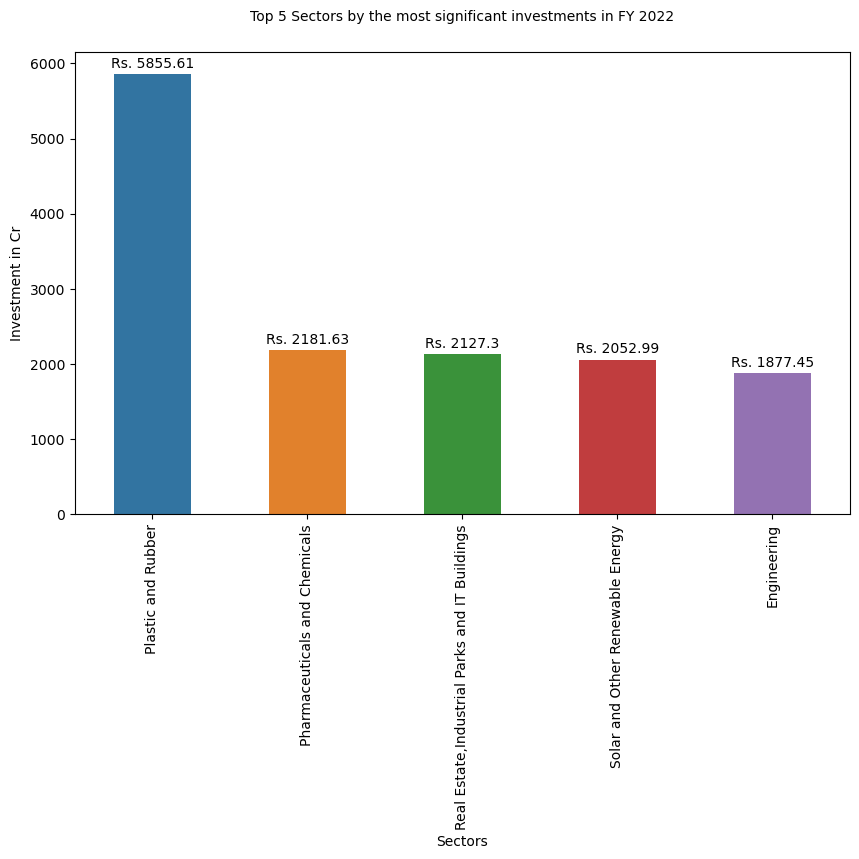

In [73]:
# Ploting these top 5 sectors:

plt.figure(figsize=(10,6))
sns.barplot(data=df_ts_8_2,x=df_ts_8_2.index, y=df_ts_8_2['investment in cr'], width=0.5)
plt.xlabel('Sectors')
plt.ylabel('Investment in Cr')
plt.title('Top 5 Sectors by the most significant investments in FY 2022',fontsize=10, y=1.05)
plt.xticks(rotation=90)

for i,v in enumerate(df_ts_8_2['investment in cr']):
    plt.text(i, v+50, 'Rs. '+str(round(v, 2)), ha='center', va='bottom')
plt.show()

#### Figure 8.1: Top 5 sectors that have witnessed the most significant investments in FY 2022.

#### Insight:

> The above barplot is the graphical representation of the top 5 sectors that have witnessed the most significant investments in FY 2022. In fiscal year, "Plastic and Rubber" sector is at 1st place, followed by "Pharmaceuticals and Chemicals" at 2nd place, "Real Estate,Industrial Parks and IT Buildings" at 3rd place, "Solar and Other Renewable Energy" at 4th place, and "Engineering" sector in the last.

#### Research Question 9:

List down the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022? What factors could have led to the substantial investments in these particular districts?

In [74]:
df_TS_iPASS_merged.shape
# df_TS_iPASS_merged['year'].unique()

(5753, 9)

In [75]:
df_ts_9_1 = df_TS_iPASS_merged[(df_TS_iPASS_merged['fiscal_year'] >= 2019) & (df_TS_iPASS_merged['fiscal_year'] <= 2022)]
df_ts_9_2 = df_ts_9_1.groupby(['district','sector','fiscal_year'],as_index=False)[['investment in cr','number_of_employees']].sum()
df_ts_9_3 = df_ts_9_2.groupby(['district','sector'],as_index=False)[['investment in cr','number_of_employees']].sum()
# df_ts_9_3

In [76]:
df_ts_9_3.columns

Index(['district', 'sector', 'investment in cr', 'number_of_employees'], dtype='object')

In [77]:
ind_max = df_ts_9_3.groupby('district')['investment in cr'].idxmax()

df_ts_9_4 = df_ts_9_3.loc[ind_max,['district', 'sector', 'investment in cr']].sort_values(by='investment in cr',ascending=False).nlargest(3,'investment in cr')
df_ts_9_4

,district,sector,investment in cr
335,Rangareddy,"Real Estate,Industrial Parks and IT Buildings",28970.2729
299,Peddapalli,"Fertlizers Organic and Inorganic,Pesticides,In...",5254.2800
219,Medchal_Malkajgiri,Pharmaceuticals and Chemicals,4000.9724


#### Insight:

> The above table shows the list of the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022. 
> 1. "Real Estate,Industrial Parks and IT Buildings" in "Rangareddy" district. It appears the many IT companies finds "Rangareddy" as their faviorable place for their business operation, which in turn is boosting the govt investment to build more IT parks and special economic zones. Due to IT companies, it is also attracting migrants from other places, who in turn invest in real estate.
> 2. "Fertlizers Organic and Inorganic,Pesticides" in "Peddapalli" district. Peddanpalli has more in agricultre items and products.
> 3. "Pharmaceuticals and Chemicals" in "Medchal_Malkajgiri" district. "Medchal_Malkajgiri" is a favourite place for pharma companies.

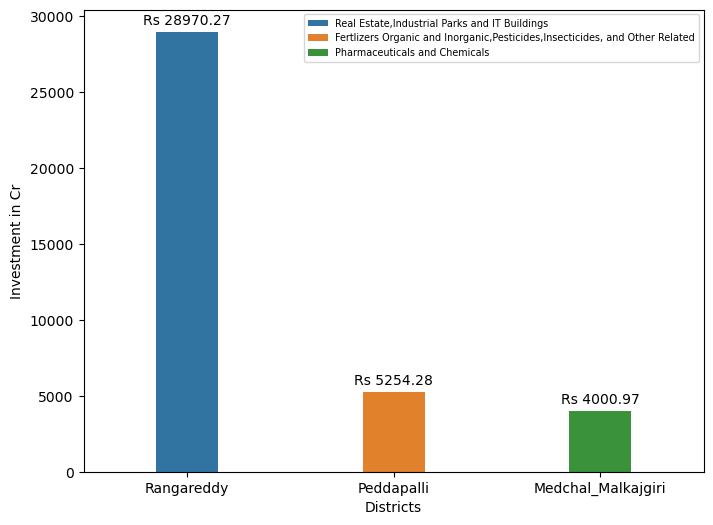

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_ts_9_4,x=df_ts_9_4['district'],y=df_ts_9_4['investment in cr'], width=0.3, label=df_ts_9_4['sector'])

for i,v in enumerate(df_ts_9_4['investment in cr']):
    plt.text(i,v+250,'Rs '+str(round(v,2)), ha='center', va='bottom')

plt.legend(loc='upper right',fontsize='x-small')
plt.xlabel('Districts')
plt.ylabel('Investment in Cr')
plt.show()

#### Figure 9.1: Top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022

#### Insight:

> The above bar plot is graphical representation and shows the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022.

#### Research Question 10:

Is there any relationship between district investments, vehicles sales and stamps revenue within the same district between FY 2021 and 2022?

In [79]:
df_fact_stamps.columns
# df_fact_transport
# df_fact_TS_iPASS

Index(['dist_code', 'month', 'documents_registered_cnt',
       'documents_registered_rev', 'estamps_challans_cnt',
       'estamps_challans_rev'],
      dtype='object')

In [80]:
df_stamps = df_fact_stamps[['dist_code', 'month', 'documents_registered_rev', 'estamps_challans_rev']]

In [81]:
df0 = pd.merge(df_stamps,df_fact_transport,how='inner',on='dist_code')
df_merged = pd.merge(df0,df_TS_iPASS_merged,how='inner',on='dist_code')

In [82]:
df_merged = df_merged[(df_merged['fiscal_year'] == 2021) | (df_merged['fiscal_year'] == 2022)]
df_merged['fiscal_year'].unique()

array([2021, 2022], dtype=int64)

In [83]:
df_merged=df_merged[['documents_registered_rev', 'estamps_challans_rev', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others',
       'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others', 'seatCapacity_1_to_3', 'seatCapacity_4_to_6',
       'seatCapacity_above_6', 'Brand_new_vehicles', 'Pre-owned_vehicles', 'category_Non-Transport', 'category_Transport', 'investment in cr']]

In [84]:
df_merged.corr(numeric_only=True)[['investment in cr']].T

,documents_registered_rev,estamps_challans_rev,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,investment in cr
investment in cr,0.128402,0.099836,0.104902,0.098572,0.070449,0.059452,0.09827,0.115932,-0.004918,-0.033757,0.097329,0.099031,0.116969,0.110155,0.104243,0.111718,0.105115,0.093555,1.0


In [85]:
# sns.heatmap(df_merged.corr(numeric_only=True), annot=True, cmap='coolwarm')

#### Research Question 11:

Are there any particular sectors that have shown substantial investment in multiple districts between FY 2021 and 2022?

In [86]:
df_TS_iPASS_merged.head()

,dist_code,month,sector,investment in cr,number_of_employees,district,Mmm,quarter,fiscal_year
0,14_1,2019-04-01,Engineering,2.3200,15,Mahabubnagar,Apr,Q1,2019
1,14_1,2019-04-01,Paper and Printing,14.4000,305,Mahabubnagar,Apr,Q1,2019
2,19_1,2019-04-01,Engineering,0.6250,13,Adilabad,Apr,Q1,2019
3,19_1,2019-04-01,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99,Adilabad,Apr,Q1,2019
4,19_1,2019-04-01,Food Processing,0.0980,7,Adilabad,Apr,Q1,2019


In [87]:
df_11_1 = df_TS_iPASS_merged[df_TS_iPASS_merged['fiscal_year'].isin([2021,2022])]
df_11_2 = df_11_1.groupby(['sector','district'],as_index=False)[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False)
df_11_2

,sector,district,investment in cr
308,Plastic and Rubber,Rangareddy,4633.1975
323,"Real Estate,Industrial Parks and IT Buildings",Rangareddy,4131.3560
309,Plastic and Rubber,Sangareddy,2807.0000
283,Pharmaceuticals and Chemicals,Sangareddy,2387.4176
275,Pharmaceuticals and Chemicals,Medchal_Malkajgiri,2098.2918
...,...,...,...
146,"Fertlizers Organic and Inorganic,Pesticides,In...",Vikarabad,0.0650
295,Plastic and Rubber,Kamareddy,0.0600
122,Engineering,Mulugu,0.0350
373,Wood and Leather,Nirmal,0.0000


In [88]:
# df_11_2[df_11_2.groupby(['sector','district'])['district'].transform('count')>2]
# df_11_2.groupby(['sector','district']).size()

In [89]:
thresold_investment = df_11_2['investment in cr'].quantile(0.95)
df_11_3 = df_11_2[df_11_2['investment in cr']>thresold_investment]
df_11_3.sort_values(by='sector')

,sector,district,investment in cr
25,Agro based incl Cold Storages,Siddipet,722.0074
34,Automobile,Sangareddy,1289.9090
50,Beverages,Narayanpet,1467.0000
88,"Cement, Cement & Concrete Products, Fly Ash Br...",Suryapet,952.3789
121,Engineering,Medchal_Malkajgiri,455.5148
129,Engineering,Rangareddy,717.0595
120,Engineering,Medak,774.0522
203,Granite and Stone Crushing,Rangareddy,592.7862
244,Paper and Printing,Bhadradri Kothagudem,984.1885
283,Pharmaceuticals and Chemicals,Sangareddy,2387.4176


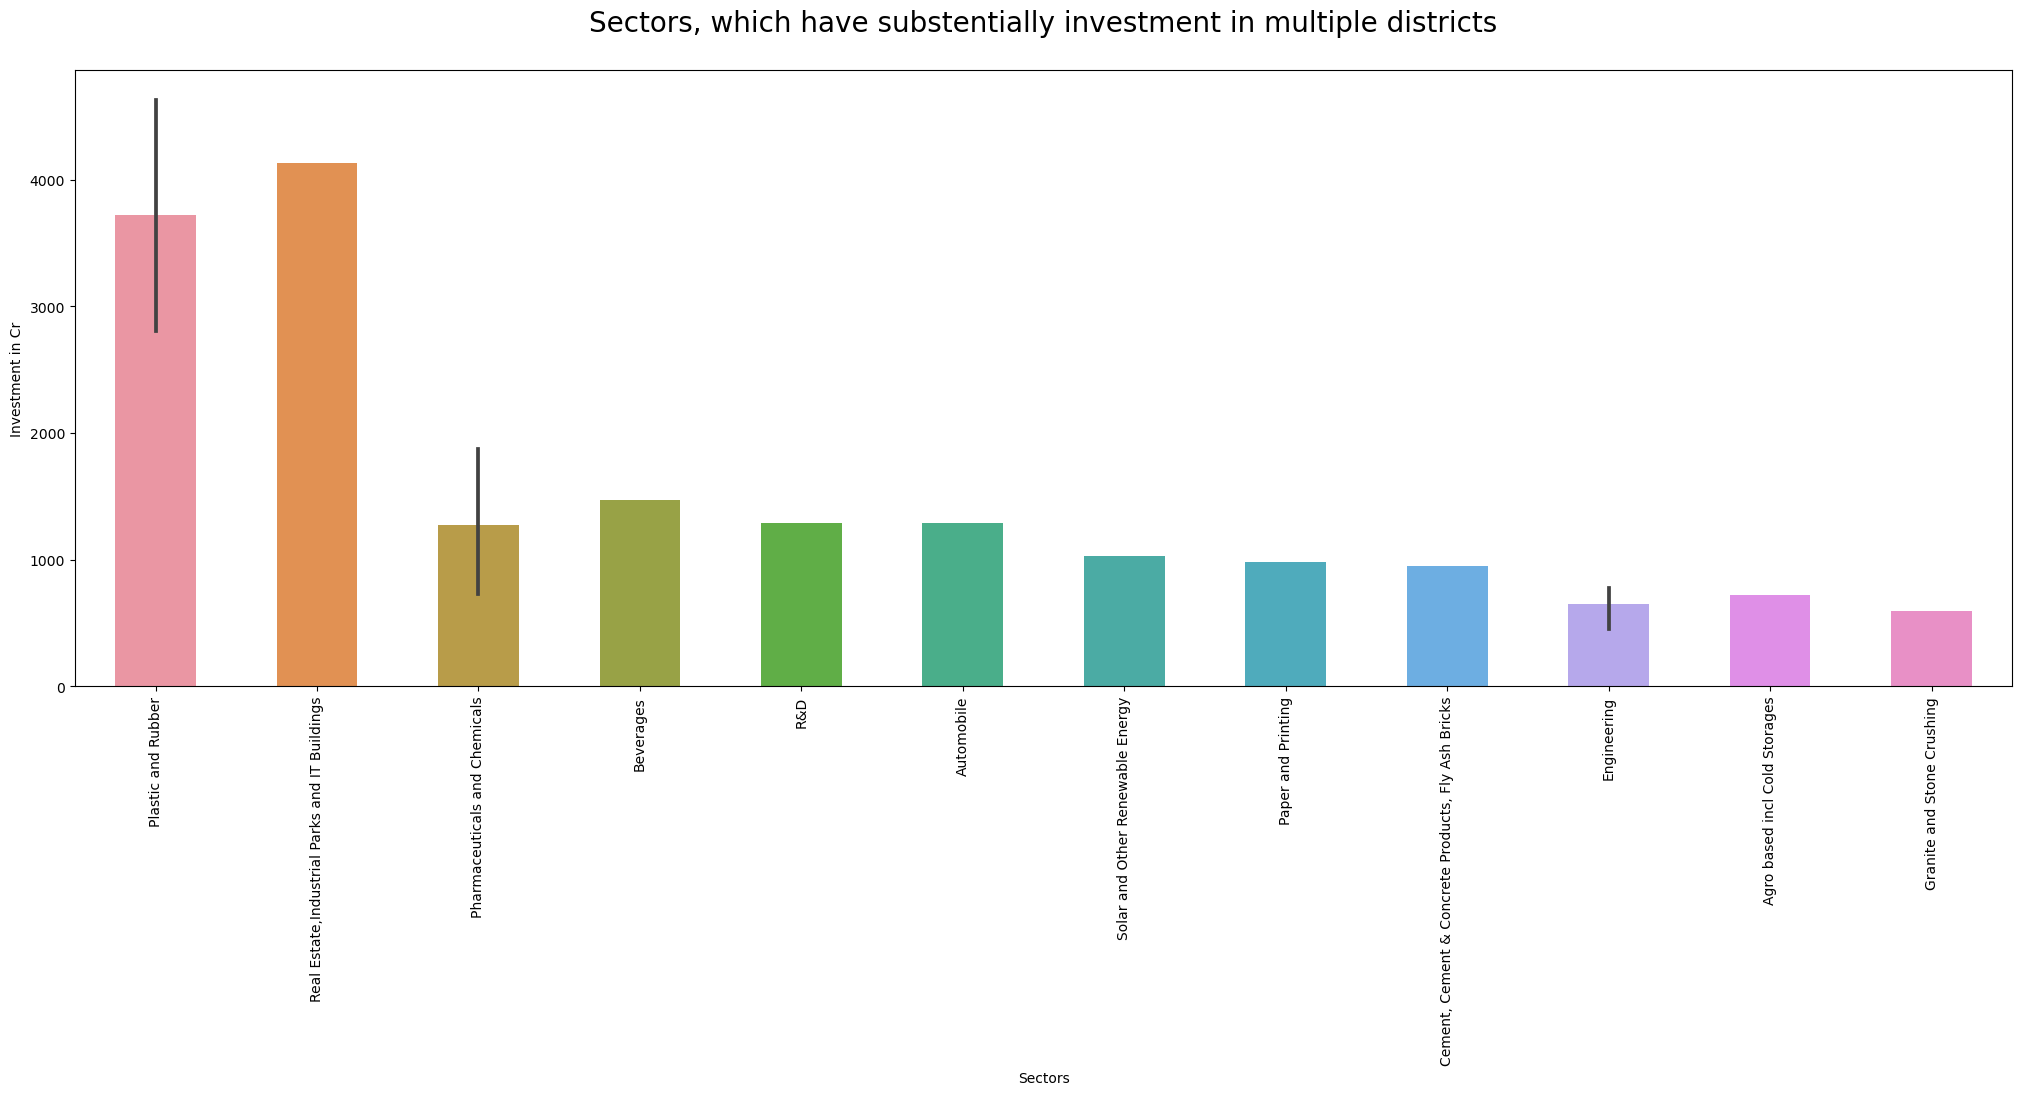

In [90]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_11_3, x=df_11_3['sector'], y=df_11_3['investment in cr'], width=0.5)
# plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.xlabel('Sectors')
plt.ylabel('Investment in Cr')
plt.title('Sectors, which have substentially investment in multiple districts', fontsize=20, y=1.05)
plt.show()

**Question 12.** 

Can we identify any seasonal patterns or cyclicality in the investment trends for specific sectors? Do certain sectors experience higher investments during particular months?

In [91]:
df_TS_iPASS_merged.head()

,dist_code,month,sector,investment in cr,number_of_employees,district,Mmm,quarter,fiscal_year
0,14_1,2019-04-01,Engineering,2.3200,15,Mahabubnagar,Apr,Q1,2019
1,14_1,2019-04-01,Paper and Printing,14.4000,305,Mahabubnagar,Apr,Q1,2019
2,19_1,2019-04-01,Engineering,0.6250,13,Adilabad,Apr,Q1,2019
3,19_1,2019-04-01,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99,Adilabad,Apr,Q1,2019
4,19_1,2019-04-01,Food Processing,0.0980,7,Adilabad,Apr,Q1,2019


In [92]:
df12_month = df_TS_iPASS_merged.groupby('month',as_index=False)['investment in cr'].sum()
df12_month.head()

,month,investment in cr
0,2019-04-01,1609.9390
1,2019-05-01,1425.4494
2,2019-06-01,1380.4319
3,2019-07-01,2335.6674
4,2019-08-01,1165.6896


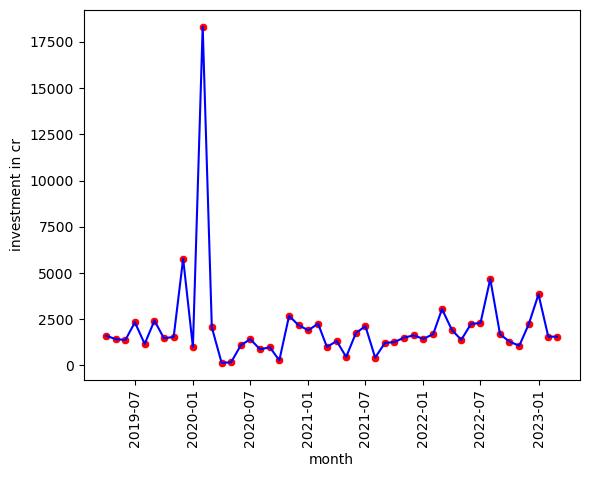

In [93]:
# ploting a graph

sns.scatterplot(data=df12_month, x=df12_month['month'], y=df12_month['investment in cr'], color='red')
sns.lineplot(data=df12_month, x=df12_month['month'], y=df12_month['investment in cr'], color='blue')
# plt.xticks([int(y) for y in df12_month['month']])
plt.xticks(rotation=90)
plt.show()

In [94]:
df_TS_iPASS_merged.columns

Index(['dist_code', 'month', 'sector', 'investment in cr',
       'number_of_employees', 'district', 'Mmm', 'quarter', 'fiscal_year'],
      dtype='object')

In [95]:
df12_1 = df_TS_iPASS_merged[['month', 'fiscal_year', 'sector','investment in cr']]

In [96]:
df12_2 = df12_1.groupby(['sector'], as_index=False)['investment in cr'].sum()

In [97]:
# Top 5 sectors
df12_2.nlargest(6,'investment in cr')[['sector']]

,sector
15,"Real Estate,Industrial Parks and IT Buildings"
12,Pharmaceuticals and Chemicals
13,Plastic and Rubber
16,Solar and Other Renewable Energy
6,"Fertlizers Organic and Inorganic,Pesticides,In..."
5,Engineering


In [98]:
df12_re = df12_1[df12_1['sector'] == 'Real Estate,Industrial Parks and IT Buildings'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_pc = df12_1[df12_1['sector'] == 'Pharmaceuticals and Chemicals'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_pr = df12_1[df12_1['sector'] == 'Plastic and Rubber'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_sre = df12_1[df12_1['sector'] == 'Solar and Other Renewable Energy'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_fo = df12_1[df12_1['sector'].str.contains('Fertlizers Organic and Inorganic,Pesticides,In...',case=False)].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_eng = df12_1[df12_1['sector'] == 'Engineering'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)

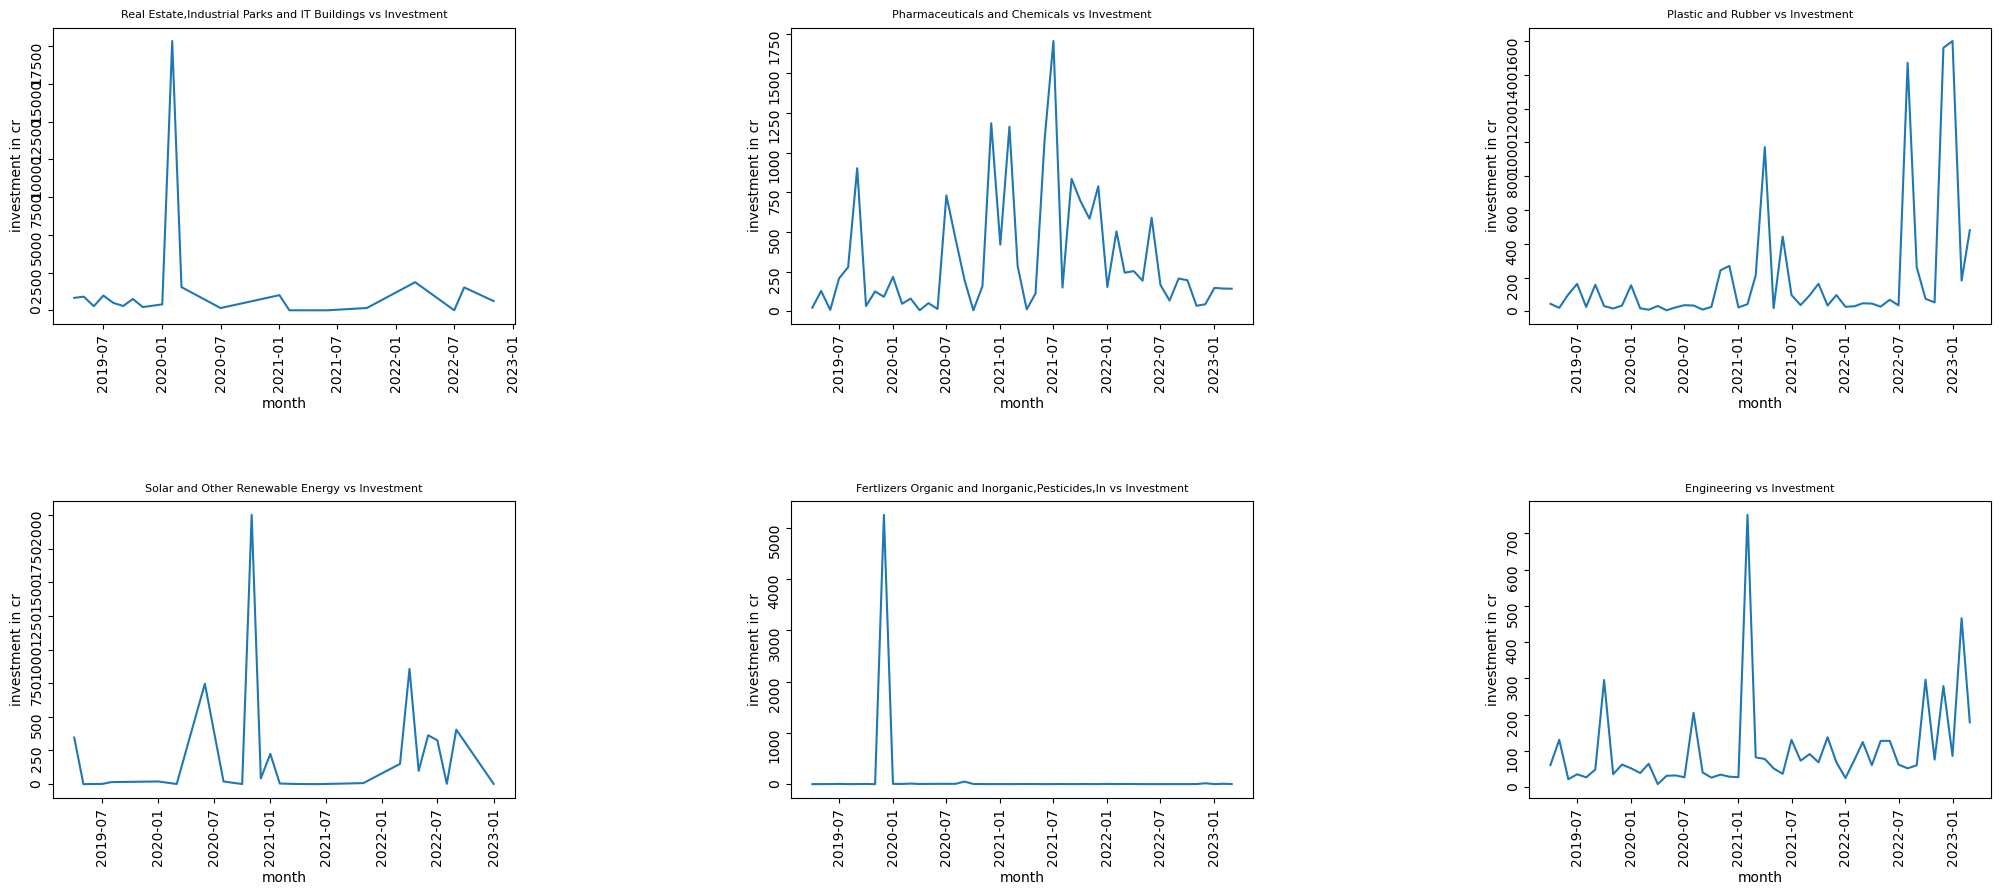

In [99]:
fig, axes = plt.subplots(2,3,figsize=(25,10))

sns.lineplot(data=df12_re, x=df12_re['month'], y=df12_re['investment in cr'],ax=axes[0,0])
axes[0,0].tick_params(rotation=90)
axes[0,0].set_title('Real Estate,Industrial Parks and IT Buildings vs Investment', fontsize=8, y=1.005)

sns.lineplot(data=df12_pc, x=df12_pc['month'], y=df12_pc['investment in cr'],ax=axes[0,1])
axes[0,1].tick_params(rotation=90)
axes[0,1].set_title('Pharmaceuticals and Chemicals vs Investment', fontsize=8, y=1.005)

sns.lineplot(data=df12_pr, x=df12_pr['month'], y=df12_pr['investment in cr'],ax=axes[0,2])
axes[0,2].tick_params(rotation=90)
axes[0,2].set_title('Plastic and Rubber vs Investment', fontsize=8, y=1.005)

sns.lineplot(data=df12_sre, x=df12_sre['month'], y=df12_sre['investment in cr'],ax=axes[1,0])
axes[1,0].tick_params(rotation=90)
axes[1,0].set_title('Solar and Other Renewable Energy vs Investment', fontsize=8, y=1.005)


sns.lineplot(data=df12_fo, x=df12_fo['month'], y=df12_fo['investment in cr'],ax=axes[1,1])
axes[1,1].tick_params(rotation=90)
axes[1,1].set_title('Fertlizers Organic and Inorganic,Pesticides,In vs Investment', fontsize=8, y=1.005)


sns.lineplot(data=df12_eng, x=df12_eng['month'], y=df12_eng['investment in cr'],ax=axes[1,2])
axes[1,2].tick_params(rotation=90)
axes[1,2].set_title('Engineering vs Investment', fontsize=8, y=1.005)

plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()

In [100]:
# bottom 6 sectors
df12_2.nsmallest(6,'investment in cr')[['sector']]

,sector
18,Thermal Power Plant
19,Wood and Leather
9,Industrial Parks and IT Buildings
4,Electrical and Electronic Products
1,Automobile
17,Textiles


In [101]:
df12_tp = df12_1[df12_1['sector'].str.contains('Thermal Power Plant', case=False)].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)

In [102]:
df12_tp = df12_1[df12_1['sector'].str.contains('Thermal Power Plant', case=False)].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_wl = df12_1[df12_1['sector'].str.contains('Wood and Leather',case=False)].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_ipit = df12_1[df12_1['sector'] == 'Industrial Parks and IT Buildings'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_eep = df12_1[df12_1['sector'] == 'Electrical and Electronic Products'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_auto = df12_1[df12_1['sector'].str.contains('Automobile',case=False)].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)
df12_txt = df12_1[df12_1['sector'] == 'Textiles'].groupby('month',as_index=False)['investment in cr'].sum().sort_values(by='investment in cr', ascending=False)

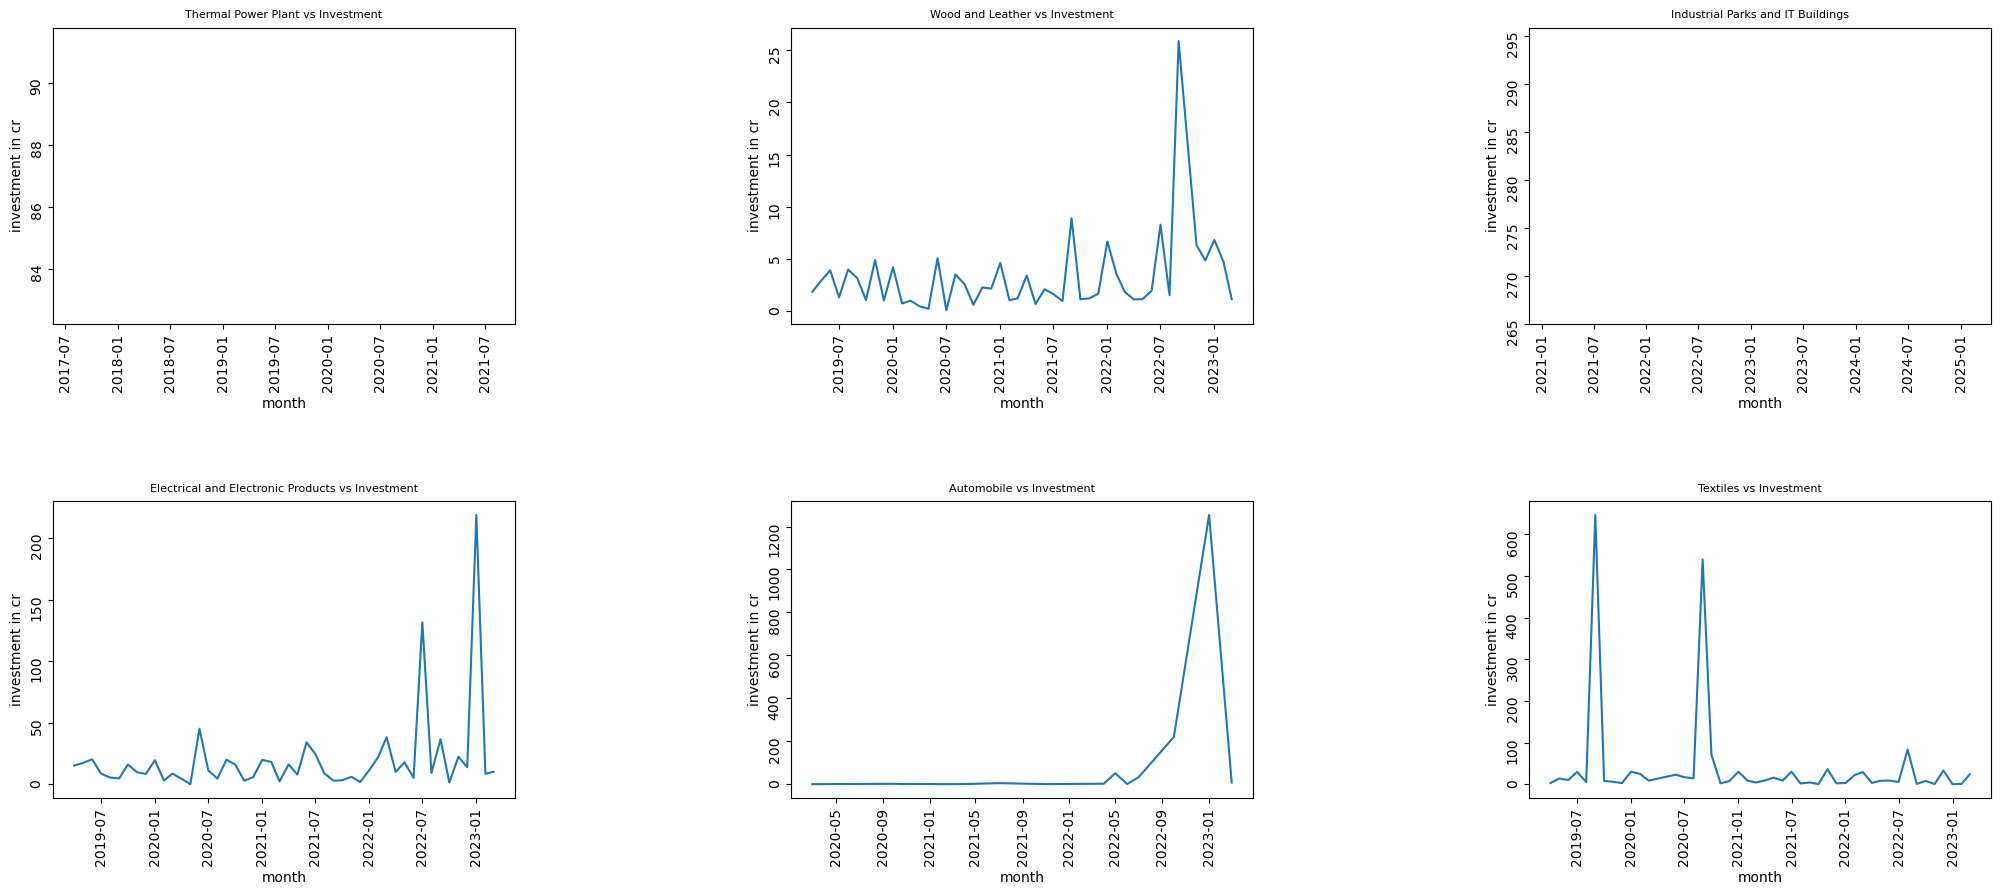

In [103]:
fig, axes = plt.subplots(2,3,figsize=(25,10))

sns.lineplot(data=df12_tp, x=df12_tp['month'], y=df12_tp['investment in cr'],ax=axes[0,0])
axes[0,0].tick_params(rotation=90)
axes[0,0].set_title('Thermal Power Plant vs Investment', fontsize=8, y=1.005)

sns.lineplot(data=df12_wl, x=df12_wl['month'], y=df12_wl['investment in cr'],ax=axes[0,1])
axes[0,1].tick_params(rotation=90)
axes[0,1].set_title('Wood and Leather vs Investment', fontsize=8, y=1.005)

sns.lineplot(data=df12_ipit, x=df12_ipit['month'], y=df12_ipit['investment in cr'],ax=axes[0,2])
axes[0,2].tick_params(rotation=90)
axes[0,2].set_title('Industrial Parks and IT Buildings', fontsize=8, y=1.005)

sns.lineplot(data=df12_eep, x=df12_eep['month'], y=df12_eep['investment in cr'],ax=axes[1,0])
axes[1,0].tick_params(rotation=90)
axes[1,0].set_title('Electrical and Electronic Products vs Investment', fontsize=8, y=1.005)


sns.lineplot(data=df12_auto, x=df12_auto['month'], y=df12_auto['investment in cr'],ax=axes[1,1])
axes[1,1].tick_params(rotation=90)
axes[1,1].set_title('Automobile vs Investment', fontsize=8, y=1.005)


sns.lineplot(data=df12_txt, x=df12_txt['month'], y=df12_txt['investment in cr'],ax=axes[1,2])
axes[1,2].tick_params(rotation=90)
axes[1,2].set_title('Textiles vs Investment', fontsize=8, y=1.005)

plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()

--------------------

## Secondary Research: (Need additional research and get additional data)

1. What are the top 5 districts to buy commercial properties in Telangana? Justify your answer.

Answer:

    In order to find a preferred places to purchase commercial properties, we need to consider following aspects. 

    1. What is connectivity between the places and availbility of public transport services
    2. Which area is booming in terms of investment or are there any new investments are coming to any districts
    3. Districts which are generating higher revenue from document registration.

    By analysing the datasets above, this appears that the below 5 districts are standing on top list of preferred places to buy commercial properties:

        1. Rangareddy
        2. Hyderabad
        3. Medchal_Malkajgiri
        4. Sangareddy
        5. Peddapalli

In [104]:
df_stamps_merged = pd.merge(df_fact_stamps,df_dim_districts, how='inner', on='dist_code')
df_trans_merged = pd.merge(df_fact_transport,df_dim_districts,how= 'inner', on='dist_code')
df_TS_iPASS_merged = pd.merge(df_fact_TS_iPASS, df_dim_districts, how='inner', on='dist_code')

In [105]:
df_stamps_merged.groupby('district')[['documents_registered_rev','estamps_challans_rev']].sum().nlargest(5,'documents_registered_rev')

,documents_registered_rev,estamps_challans_rev
district,,
Rangareddy,108198682809,81336993463
Medchal_Malkajgiri,64071382839,48819368222
Hyderabad,38396743983,28652397786
Sangareddy,22024502771,16708219605
Hanumakonda,7927494100,5751116148


In [106]:
df_trans_merged.groupby('district')[['category_Transport']].sum().nlargest(5,'category_Transport')

,category_Transport
district,
Hyderabad,89885
Rangareddy,68823
Medchal_Malkajgiri,67988
Sangareddy,28993
Nalgonda,27186


In [107]:
df_TS_iPASS_merged.groupby(['district','sector'])[['investment in cr']].sum().nlargest(5,'investment in cr')

,,investment in cr
district,sector,
Rangareddy,"Real Estate,Industrial Parks and IT Buildings",28970.2729
Peddapalli,"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",5254.2800
Rangareddy,Plastic and Rubber,4993.3884
Medchal_Malkajgiri,Pharmaceuticals and Chemicals,4000.9724
Sangareddy,Pharmaceuticals and Chemicals,3547.5796


In [108]:
df_TS_iPASS_merged.groupby('district')[['investment in cr']].sum().nlargest(5,'investment in cr')

,investment in cr
district,
Rangareddy,42706.3320
Sangareddy,12366.7556
Medchal_Malkajgiri,10394.5610
Peddapalli,5715.3865
Mahabubnagar,4771.8909


--------------------------

2. What significant policies or initiatives were put into effect to enhance economic growth, investments, and employment in Telangana by the current government? Can we quantify the impact of these policies using available data?

To boost economic growth, a state should define its' policies to attract more and diversified investments. Because, economic growth often is driven by consumer spending and business investment. 

As far as Telangana is concerned and based on the available data, it appears that the govenment is investing in sectors i.e Real Estate, Industrial Parks and IT building, Pharmaceuticals and Chemicals, Plastic and Rubber, Renewable Energy, Fertilizers and agricultre chemicals, which are centainly good investment by Telangana Govt. 

On the other hand, If I would like to recommend to enhance the economic growth, government may think of other sectors such as textile, food processing, R&D, Automobile. In textile sector, government can  

In [109]:
df_TS_iPASS_merged.groupby('sector')[['investment in cr','number_of_employees']].sum().sort_values(by='investment in cr',ascending=False)

,investment in cr,number_of_employees
sector,,
"Real Estate,Industrial Parks and IT Buildings",29778.1741,352558
Pharmaceuticals and Chemicals,15858.0561,73841
Plastic and Rubber,9649.7846,23301
Solar and Other Renewable Energy,5639.7032,3926
"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",5418.3977,2325
Engineering,5024.6131,43093
Food Processing,4115.9122,40548
R&D,3520.9069,20146
Others,3229.4807,17646


3. Provide top 5 Insights & 5 recommendations to Telangana government for sustained growth in the next 5 years based on your analysis.

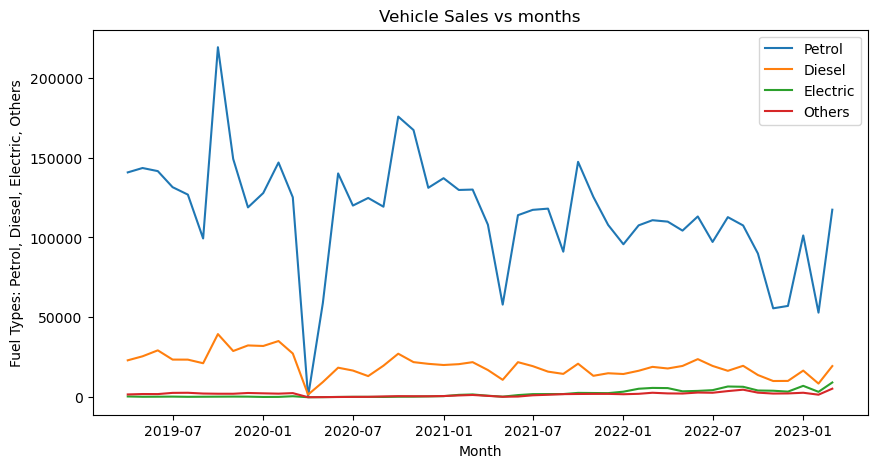

1. In terms of Vehicle sales, Petrol & diesel vehicles have more sales than other options i.e Electric vehicle. Telangana government should also introduce new strategies such as promotion or reward or tax expemption in order to boost sales of electric vehicle together, which is better enviorment friendly approach.
####
2. With regard to investment, the government is investing more in some districts, but there are many districts which are experiencing less investment, so government can explore the potentials of other disctricts where investment is less and develop strategies to boost investment options in those districts also, which can in turn boost the empolyment also. 
####
3. Based on available dataset, it is obvious that Telangana government has performed exceptionally well in some sectors i.e. Real Estate,Industrial Parks and IT Buildings, Pharmaceuticals and Chemicals, Solar and Other Renewable Energy etc. It would better, if government can develop some plan and strategies to attract the investment in other sectors, where investement is now less, but there are pontentials to increase the investement there.

In [115]:
# df_TS_iPASS_merge.groupby('district')[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False)

In [117]:
# df_TS_iPASS_merged.groupby('sector')[['investment in cr','number_of_employees']].sum().sort_values(by='investment in cr',ascending=False)